## Import

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'font.size': 32})
plt.rcParams["figure.figsize"] = (12,8)

import numpy as np
import scipy.signal
import scipy.io
import pandas as pd
import itertools

In [2]:
try:
    import dsatools
except:
    !pip install dsatools
finally:
    import dsatools
    import dsatools.utilits as ut

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import random

In [6]:
import h5py

## Data import

In [7]:
df = pd.DataFrame([])

In [8]:
# data_train1 = scipy.io.loadmat('train1.mat')
data = scipy.io.loadmat('train1.mat')

# data_test1 = scipy.io.loadmat('test1.mat')
# data_test2 = scipy.io.loadmat('test2.mat')

In [9]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'fs', 'train'])

In [10]:
fs = data['fs'][0][0]
print('Samplig frequency:%.1f'%fs)

Samplig frequency:50000.0


In [11]:
data['train'].astype(np.float32).shape

(20, 12500000)

In [16]:
hf = h5py.File("mytestfile_.hdf5", "w")
dset_x_train = hf.create_dataset('x_train_1', data=data['train'].astype(np.float32), compression='gzip', chunks=True)

In [17]:
# create HDF_5 file
with h5py.File('dataset_.hdf5', 'w') as hf:
    data = scipy.io.loadmat('train1.mat')
    x_train_1 = hf.create_dataset('x_train_1', data=data['train'].astype(np.float32), compression='gzip', chunks=True)
    del(data)
    
    data = scipy.io.loadmat('train2.mat')
    x_train_2 = hf.create_dataset('x_train_2', data=data['train'].astype(np.float32), compression='gzip', chunks=True)
    del(data)
    
    data = scipy.io.loadmat('test1.mat')
    x_test_1 = hf.create_dataset('x_test_1', data=data['test'].astype(np.float32), compression='gzip', chunks=True)
    del(data)   
    
    data = scipy.io.loadmat('test2.mat')
    x_test_2 = hf.create_dataset('x_test_2', data=data['test'].astype(np.float32), compression='gzip', chunks=True)
    del(data)     

In [18]:
x_test_2

<Closed HDF5 dataset>

In [56]:
df1 = pd.concat([df, pd.DataFrame(data['train']).astype(np.float32).T], axis=0)


MemoryError: Unable to allocate 954. MiB for an array with shape (250000000,) and data type float32

In [61]:
df1[0].to_csv('1-0.csv')

In [57]:
df1.to_csv('train1.csv')

KeyboardInterrupt: 

In [38]:
dd=data['train'][0,:30000]

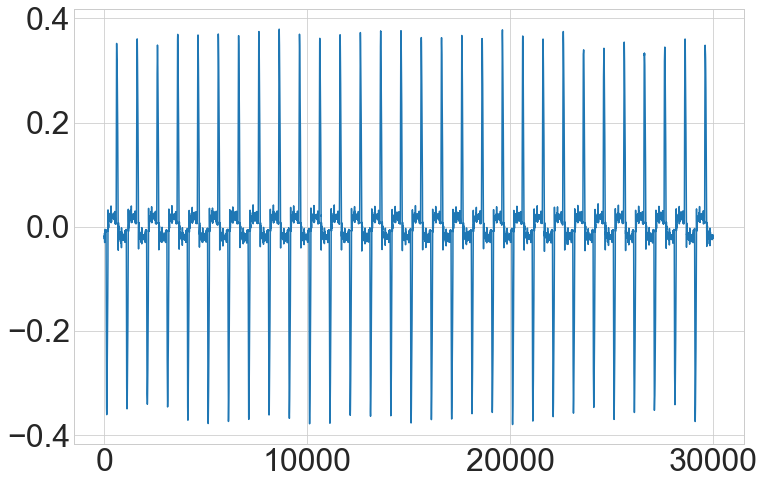

In [39]:
plt.plot(dd)

In [7]:
signal1 = data['current1']
signal2 = data['current2']
signal3 = data['current3']
signal4 = data['current4']
signal5 = data['current5']

all_size = [sig.size for sig in [signal1,signal2,signal3,signal4,signal5] ]

signals_ = np.zeros((5,max(all_size)))

signals_[0,:] = signal1[::].reshape(-1)
signals_[1,:] = signal2[::].reshape(-1)
signals_[2,:] = signal3[::].reshape(-1)
signals_[3,:] = signal4[::].reshape(-1)
signals_[4,:] = signal5[::].reshape(-1)

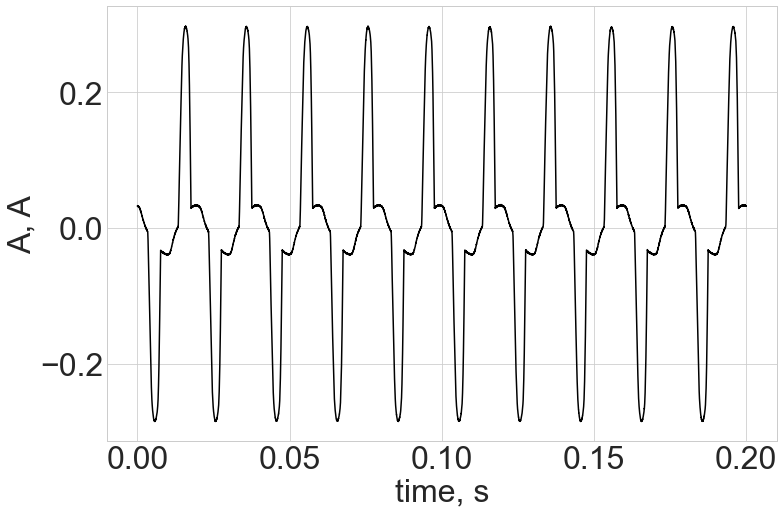

In [8]:
fs = 50e3
lp = int(10e3)
time_ = np.arange(lp)/fs
plt.plot(time_, signal1[:lp], 'k');
plt.xlabel("time, s")
plt.ylabel("A, A")
plt.savefig('typical_signals.pdf', dpi=120, format='pdf', bbox_inches='tight')
plt.show()

In [9]:
freq_ = fs/np.arange(lp)

In [10]:
freq_.shape

(10000,)

In [11]:
ut.afft(signals_[0,:]).shape

(12500000,)

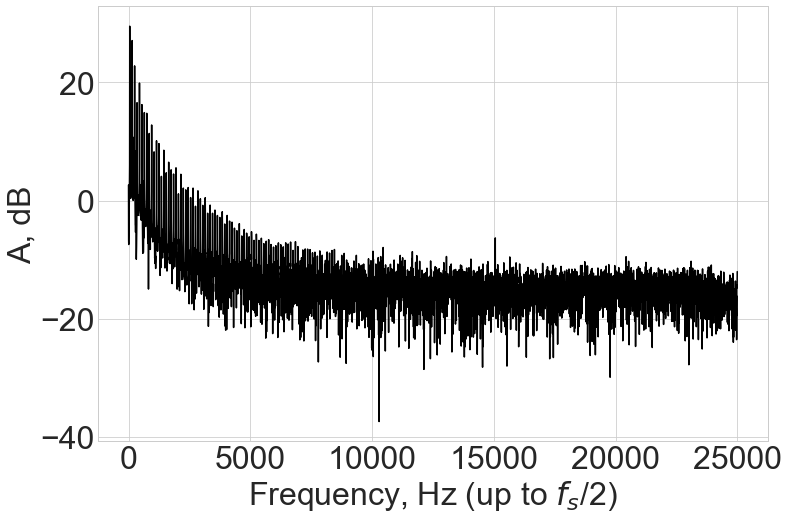

In [145]:
fs = 50e3
lp = int(10e3
        )
fs_half = lp//2

plt.plot((fs*np.arange(lp)/lp)[:fs_half], 10*np.log10(ut.afft(signals_[0,:lp])[:fs_half]), 'k');
plt.xlabel("Frequency, Hz (up to $f_s$/2)")
plt.ylabel("A, dB")
plt.savefig('typical_signal_spectrum.pdf', dpi=120, format='pdf', bbox_inches='tight')
plt.show()

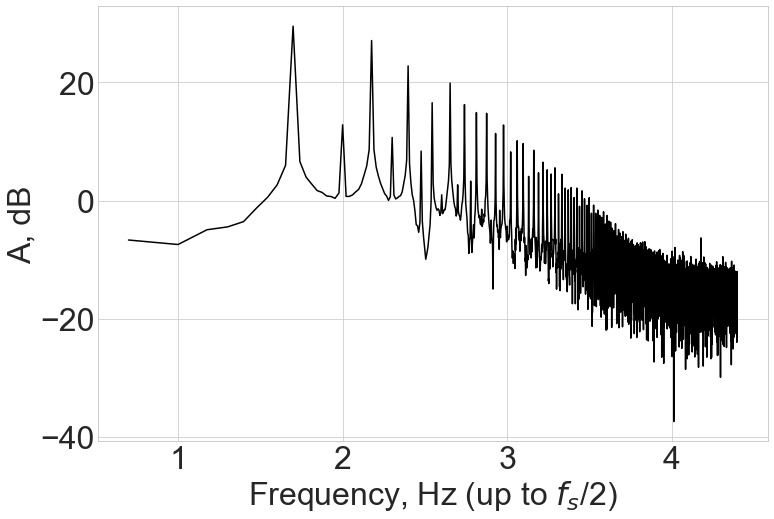

In [134]:
fs = 50e3
lp = int(10e3
        )
fs_half = lp//2

plt.plot((np.log10(fs*np.arange(lp)/lp))[:fs_half], 10*np.log10(ut.afft(signals_[0,:lp])[:fs_half]), 'k');
plt.xlabel("Frequency, Hz (up to $f_s$/2)")
plt.ylabel("A, dB")
plt.savefig('typical_signal_spectrum_log_log.pdf', dpi=120, format='pdf', bbox_inches='tight')
plt.show()

Let's see how similar are the first points 

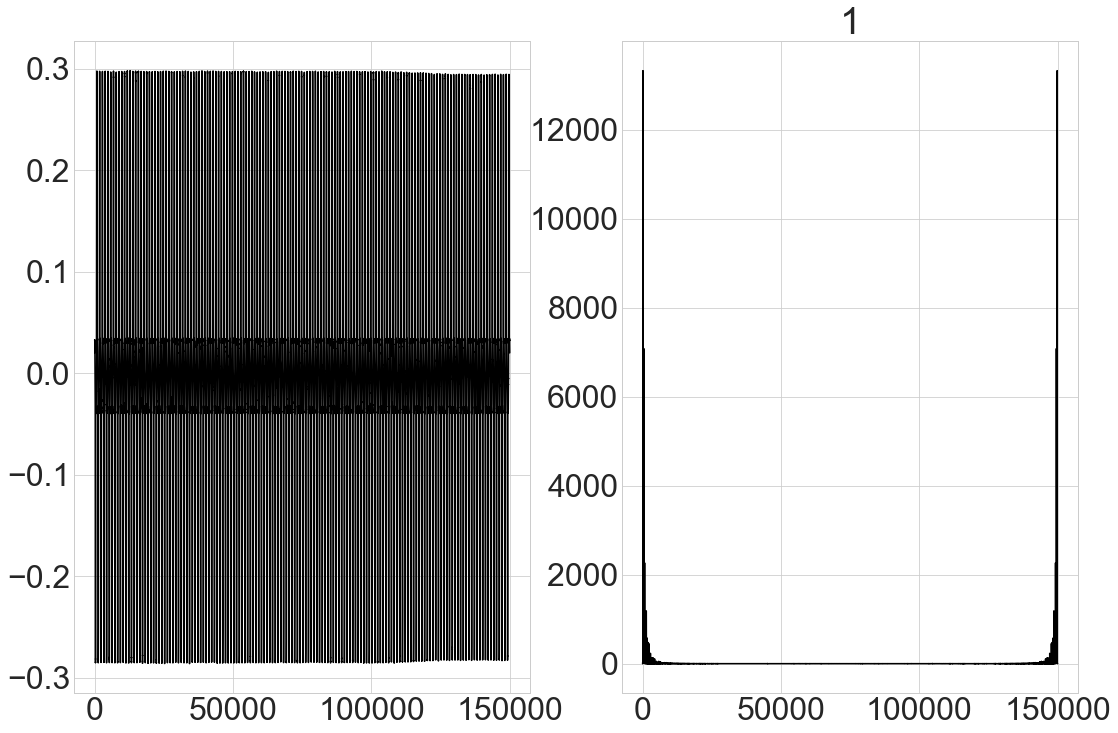

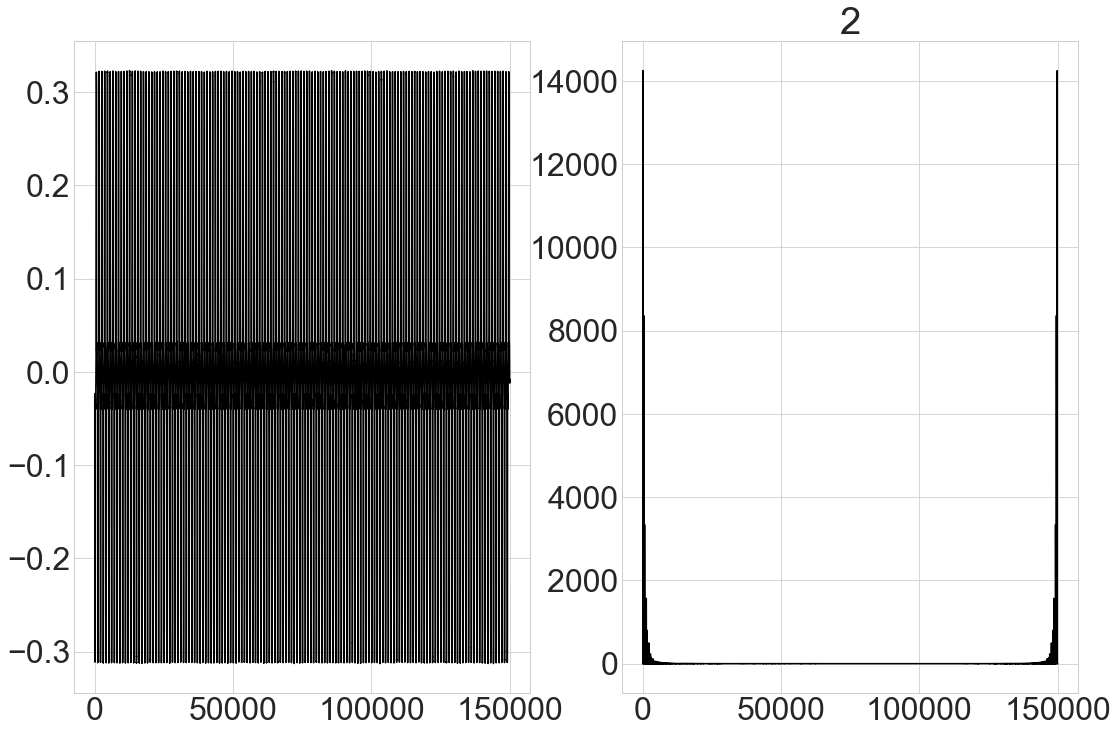

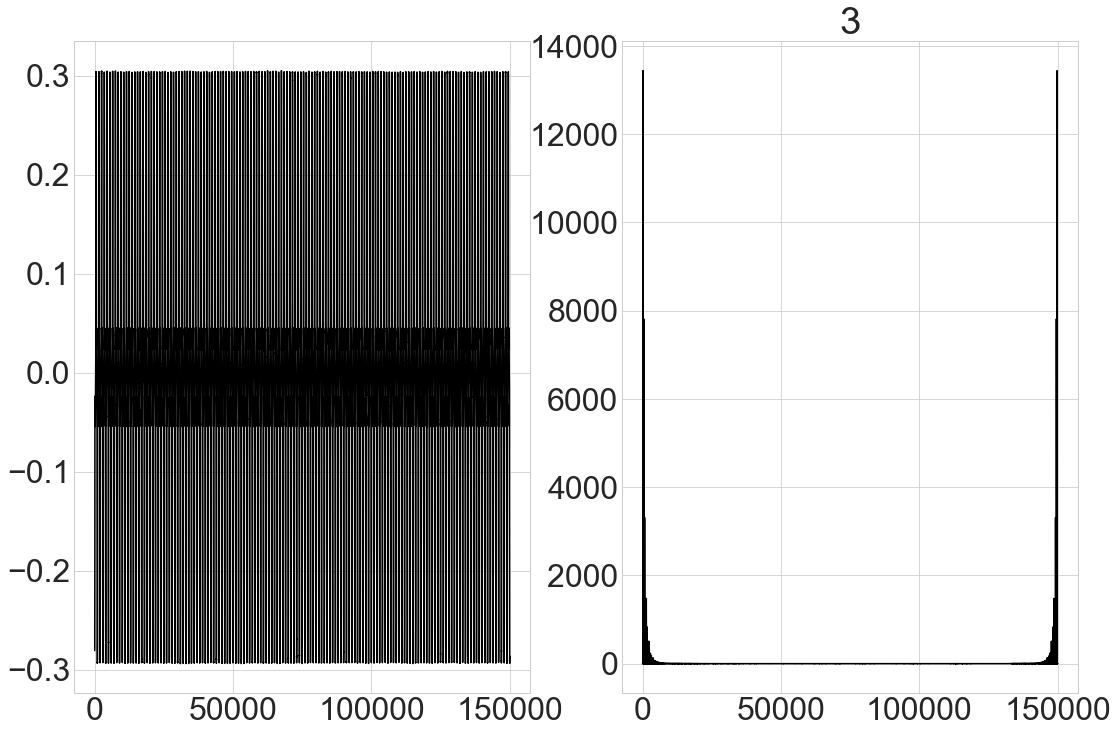

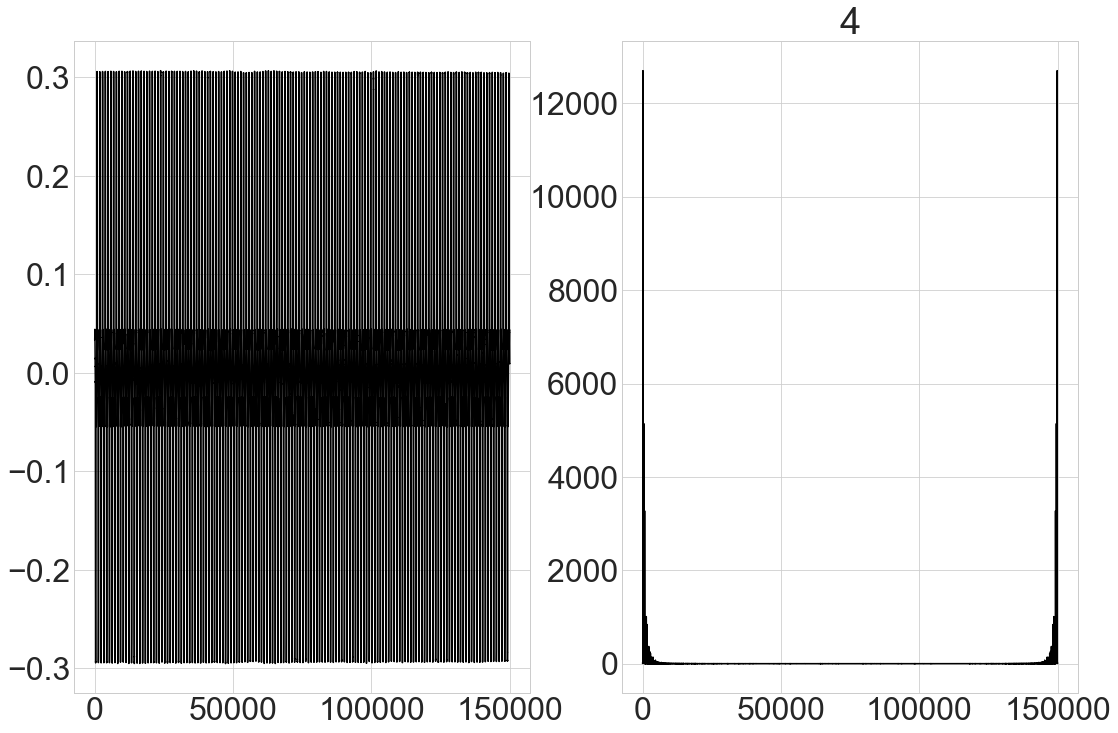

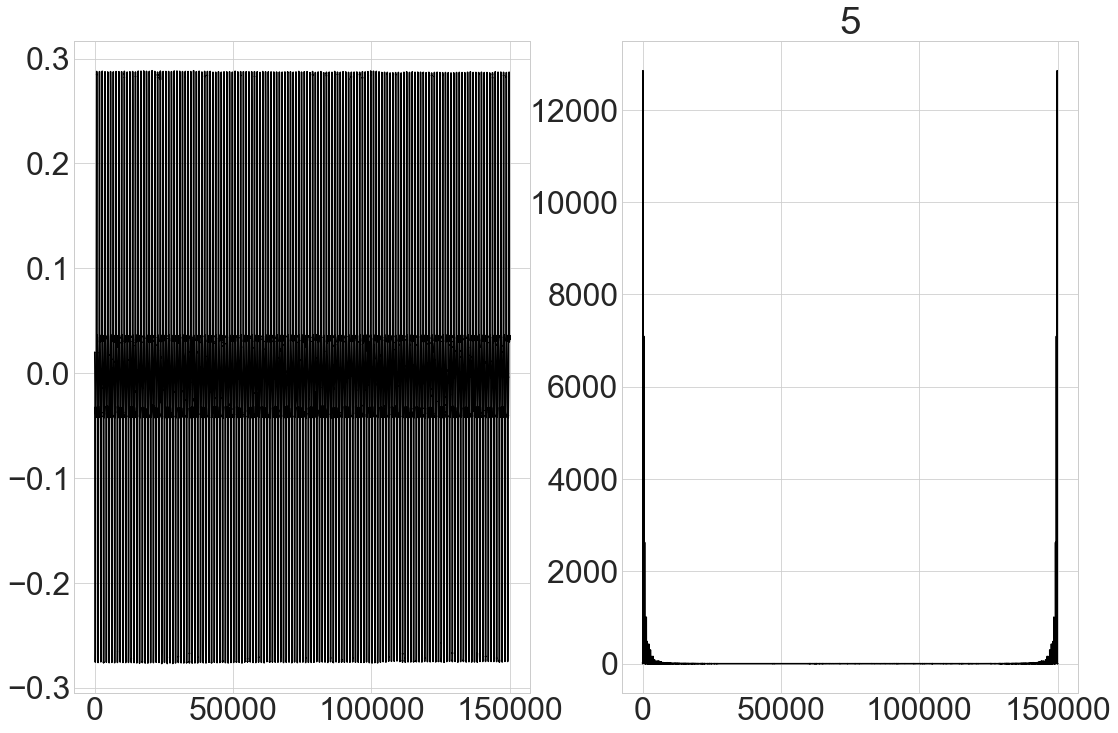

In [16]:
for i in range(5):
    ut.probe(signals_[i,:150000], title=str(i+1),figsize=(18, 12))

At least all the signals has different initial phase. But i can assume that it could be due to the asynchronous measurements 

we can additionally estiamte period by peak counting 

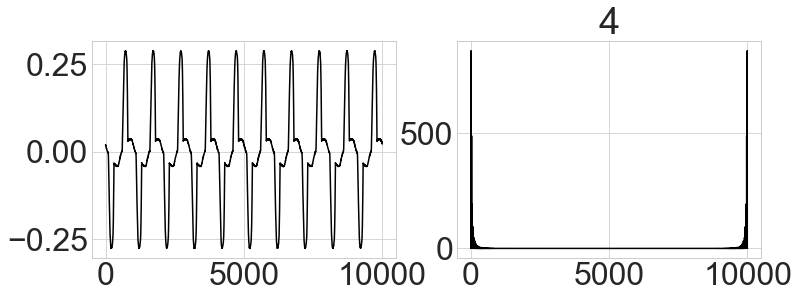

In [17]:
ut.probe(signals_[4,:10000], title='4')

we have period about 1000 points

stationarity analysis

In [18]:
def make_segments(signals_sequence, size, step, random_seed = 42 ):

    np.random.seed(random_seed)
    n_signals = len(signals_sequence)//step

    max_step = step - size

    idxs = np.random.random_integers(0, max_step, size = n_signals)

    out = np.zeros((n_signals, size))

    for i,segment in enumerate(signals_sequence[:n_signals*step].reshape(-1,step)):
        out[i,:] = segment[idxs[i]:size+idxs[i]]
    return out    

In [19]:
step = 10000

size = 9000 #1 period for random selection of start position 

In [20]:
signals = make_segments(signals_[0,:], size, step, random_seed = 42 )[np.newaxis,:,:] 

signals = np.append(signals, make_segments(signals_[1,:], size, step, random_seed = 42 )[np.newaxis,:,:],axis=0 )
signals = np.append(signals, make_segments(signals_[2,:], size, step, random_seed = 42 )[np.newaxis,:,:],axis=0 )
signals = np.append(signals, make_segments(signals_[3,:], size, step, random_seed = 42 )[np.newaxis,:,:],axis=0 )
signals = np.append(signals, make_segments(signals_[4,:], size, step, random_seed = 42 )[np.newaxis,:,:],axis=0 )

print(signals.shape)

(5, 1250, 9000)


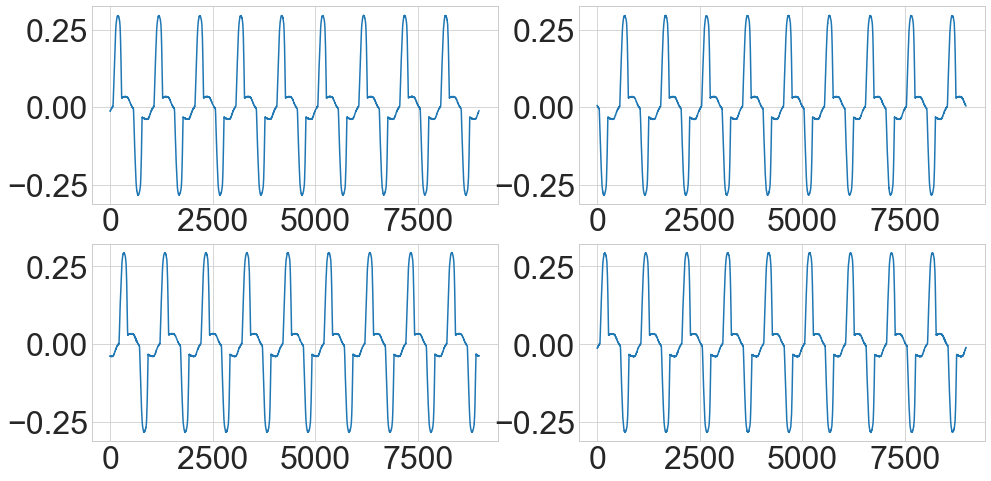

In [21]:
random_seed = 42
    
fig,axs  = plt.subplots(2,2,figsize=(16,8))
sig_idxs = np.random.randint(0,signals.shape[1],4)
for i,sig_idx in zip(range(4),sig_idxs):
    row = i//2
    col = i%2
    axs[row,col].plot(signals[0,sig_idx])
    

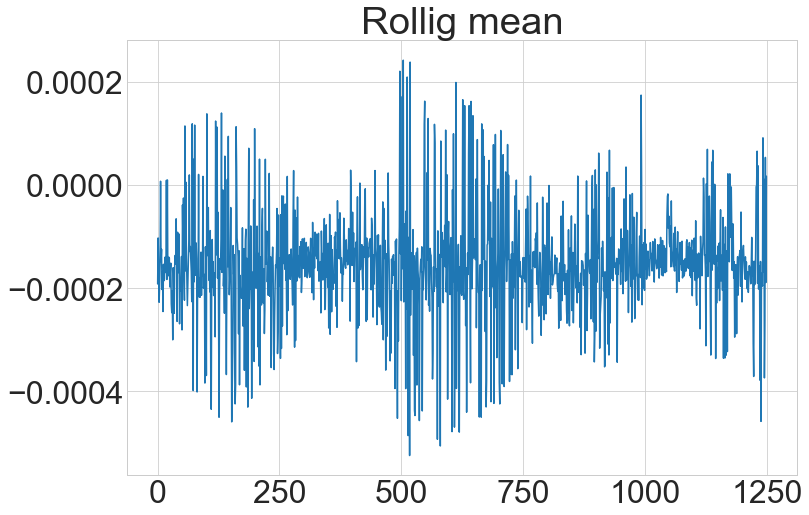

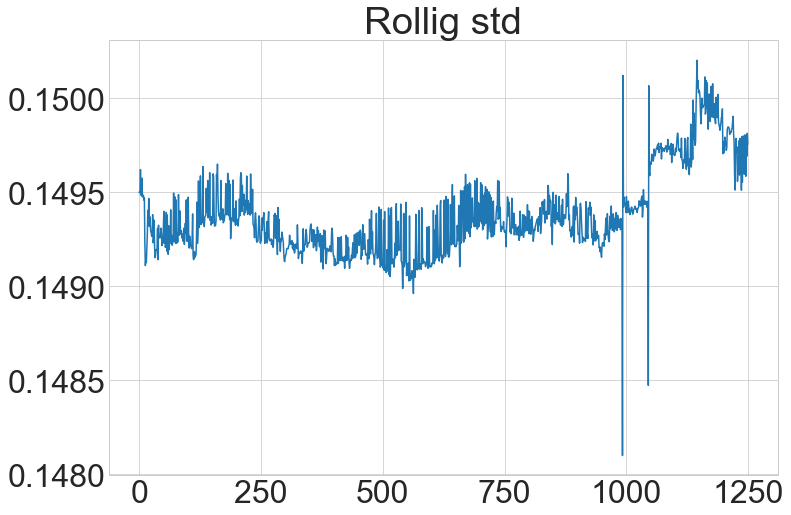

In [22]:
plt.plot(signals[0,:,:].mean(axis=1));plt.title('Rollig mean');plt.show()
plt.plot(signals[0,:,:].std(axis=1));plt.title('Rollig std');plt.show()

mean value have some small non-stationarity, which can be neglected for the first guess, variance is almost stationarity. Let's look on these measures for all signals

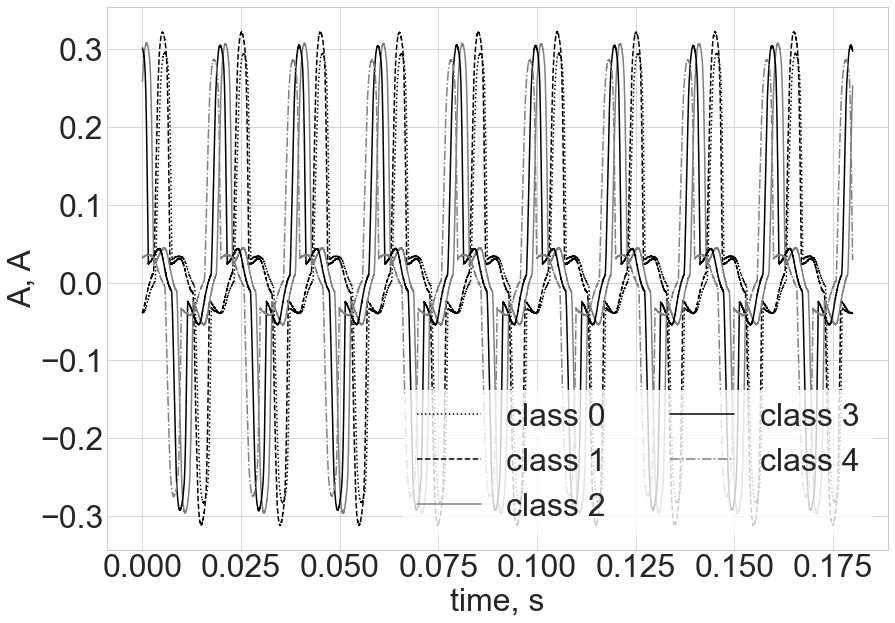

In [143]:
signals.shape
time_ = np.arange(len(signals[0,0,:]))/fs
plt.figure(figsize = (14,10))
plt.plot(time_,signals[0,random.randint(0,100),:], linestyle=':', color = 'black', label='class 0')
plt.plot(time_,signals[1,random.randint(0,100),:], linestyle='--', color = 'black', label='class 1')
plt.plot(time_,signals[2,random.randint(0,100),:], linestyle='-', color = 'gray', label='class 2')
plt.plot(time_,signals[3,random.randint(0,100),:], linestyle='-', color = 'black', label='class 3')
plt.plot(time_,signals[4,random.randint(0,100),:], linestyle='-.', color = 'gray', label='class 4')
plt.xlabel("time, s", fontsize = 32)
plt.ylabel("A, A", fontsize = 32)

legend = plt.legend(ncol = 2, fontsize = 32, frameon = 1, loc = 'lower right')
frame = legend.get_frame()
frame.set_color('white')
plt.savefig('signals_by_source.pdf', dpi=120, format='pdf', bbox_inches='tight')
plt.show()


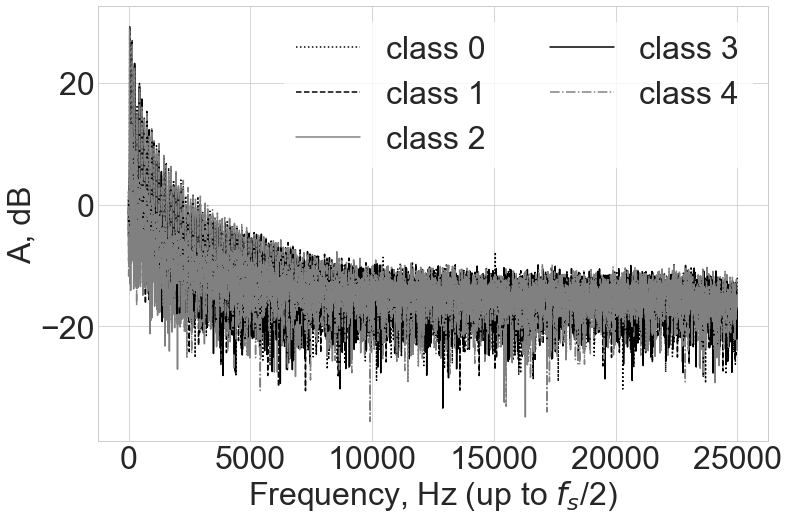

In [144]:
fs = 50e3
lp = int(9e3)
fs_half = lp//2
freqs_ = (fs*np.arange(lp)/lp)[:fs_half]
plt.plot(freqs_, 10*np.log10(ut.afft(signals_[0,:lp])[:fs_half]), linestyle=':', color = 'black', label='class 0');
plt.plot(freqs_, 10*np.log10(ut.afft(signals_[1,:lp])[:fs_half]), linestyle='--', color = 'black', label='class 1');
plt.plot(freqs_, 10*np.log10(ut.afft(signals_[2,:lp])[:fs_half]), linestyle='-', color = 'gray', label='class 2');
plt.plot(freqs_, 10*np.log10(ut.afft(signals_[3,:lp])[:fs_half]), linestyle='-', color = 'black', label='class 3');
plt.plot(freqs_, 10*np.log10(ut.afft(signals_[4,:lp])[:fs_half]), linestyle='-.', color = 'gray', label='class 4');
plt.xlabel("Frequency, Hz (up to $f_s$/2)", fontsize = 32)
plt.ylabel("A, dB", fontsize = 32)
plt.savefig('signals_by_source.pdf', dpi=120, format='pdf', bbox_inches='tight')
legend = plt.legend(ncol = 2, fontsize = 32, frameon = 1, loc = 'upper right')
frame = legend.get_frame()
frame.set_color('white')

plt.savefig('typical_signal_spectrum_by_sources.pdf', dpi=120, format='pdf', bbox_inches='tight')
plt.show()

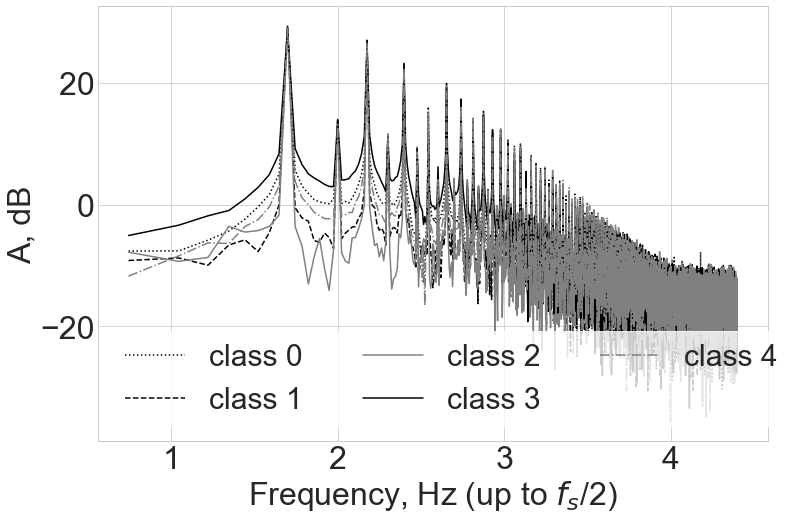

In [138]:
fs = 50e3
lp = int(9e3)
fs_half = lp//2
freqs_ = np.log10(fs*np.arange(lp)/lp)[:fs_half]
plt.plot(freqs_, 10*np.log10(ut.afft(signals_[0,:lp])[:fs_half]), linestyle=':', color = 'black', label='class 0');
plt.plot(freqs_, 10*np.log10(ut.afft(signals_[1,:lp])[:fs_half]), linestyle='--', color = 'black', label='class 1');
plt.plot(freqs_, 10*np.log10(ut.afft(signals_[2,:lp])[:fs_half]), linestyle='-', color = 'gray', label='class 2');
plt.plot(freqs_, 10*np.log10(ut.afft(signals_[3,:lp])[:fs_half]), linestyle='-', color = 'black', label='class 3');
plt.plot(freqs_, 10*np.log10(ut.afft(signals_[4,:lp])[:fs_half]), linestyle='-.', color = 'gray', label='class 4');
plt.xlabel("Frequency, Hz (up to $f_s$/2)", fontsize = 32)
plt.ylabel("A, dB", fontsize = 32)
legend = plt.legend(ncol = 3, fontsize = 30, frameon = 1, loc = 'lower left' )
frame = legend.get_frame()
frame.set_color('white')
plt.savefig('typical_signal_spectrum_log_log.pdf', dpi=120, format='pdf', bbox_inches='tight')
plt.show()

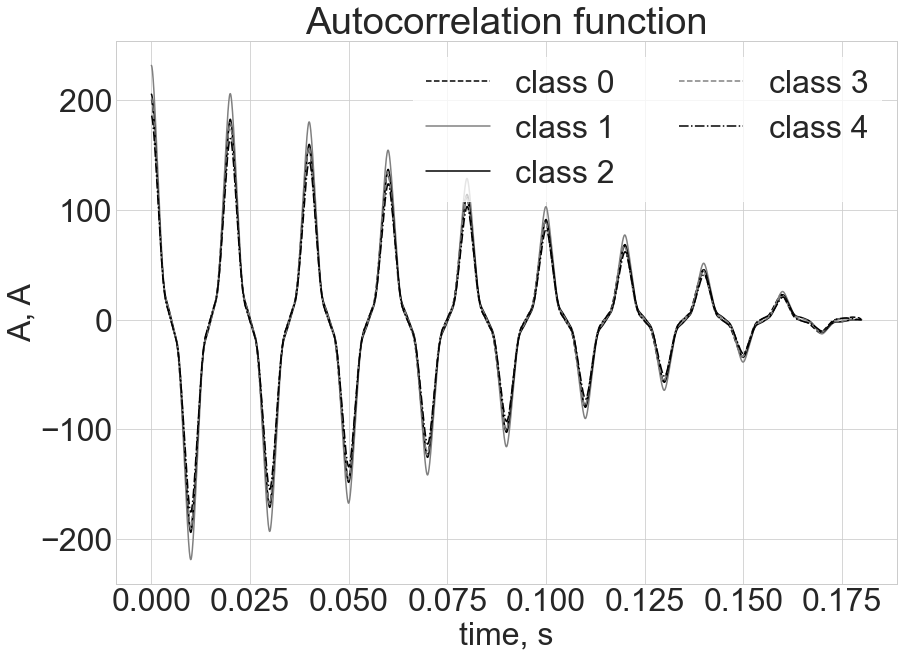

In [139]:
signals.shape
time_ = np.arange(len(signals[0,0,:]))/fs
plt.figure(figsize = (14,10))
plt.plot(time_,ut.autocorrelation(signals[0,random.randint(0,100),:]), linestyle='--', color = 'black', label='class 0')
plt.plot(time_,ut.autocorrelation(signals[1,random.randint(0,100),:]), linestyle='-', color = 'gray', label='class 1')
plt.plot(time_,ut.autocorrelation(signals[2,random.randint(0,100),:]), linestyle='-', color = 'black', label='class 2')
plt.plot(time_,ut.autocorrelation(signals[3,random.randint(0,100),:]), linestyle='--', color = 'gray', label='class 3')
plt.plot(time_,ut.autocorrelation(signals[4,random.randint(0,100),:]), linestyle='-.', color = 'black', label='class 4')
plt.xlabel("time, s", fontsize = 32)
plt.ylabel("A, A", fontsize = 32)
plt.title('Autocorrelation function')
legend = plt.legend(ncol = 2, fontsize = 32, frameon = 1)
frame = legend.get_frame()
frame.set_color('white')
plt.savefig('signals_autocor_by_source.pdf', dpi=120, format='pdf', bbox_inches='tight')
plt.show()


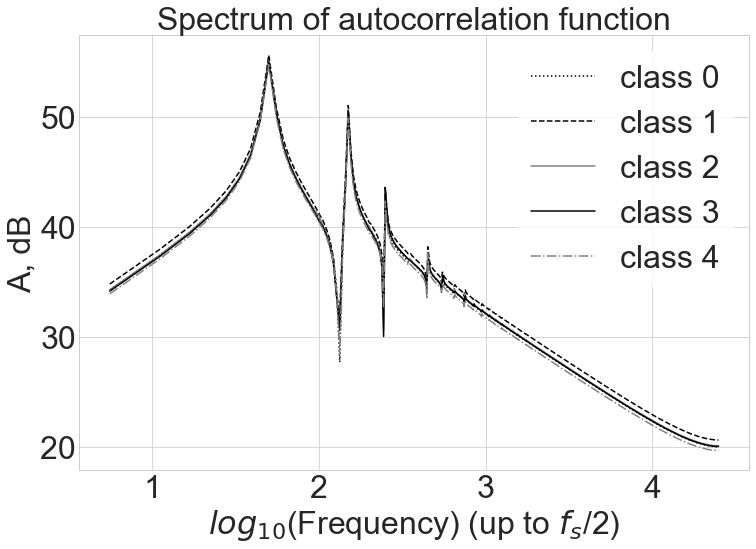

In [140]:
fs = 50e3
lp = int(9e3)
fs_half = lp//2
freqs_ = np.log10(fs*np.arange(lp)/lp)[:fs_half]
plt.plot(freqs_, 10*np.log10(ut.afft(ut.autocorrelation(signals_[0,:lp]))[:fs_half]), linestyle=':', color = 'black', label='class 0');
plt.plot(freqs_, 10*np.log10(ut.afft(ut.autocorrelation(signals_[1,:lp]))[:fs_half]), linestyle='--', color = 'black', label='class 1');
plt.plot(freqs_, 10*np.log10(ut.afft(ut.autocorrelation(signals_[2,:lp]))[:fs_half]), linestyle='-', color = 'gray', label='class 2');
plt.plot(freqs_, 10*np.log10(ut.afft(ut.autocorrelation(signals_[3,:lp]))[:fs_half]), linestyle='-', color = 'black', label='class 3');
plt.plot(freqs_, 10*np.log10(ut.afft(ut.autocorrelation(signals_[4,:lp]))[:fs_half]), linestyle='-.', color = 'gray', label='class 4');
plt.xlabel("$log_{10}$(Frequency) (up to $f_s$/2)")
plt.ylabel("A, dB")
plt.title('Spectrum of autocorrelation function', fontsize=32)
legend = plt.legend(ncol = 1, fontsize = 32, frameon = 1)
frame = legend.get_frame()
frame.set_color('white')
plt.savefig('typical_signal_spectrum-autocor.pdf', dpi=120, format='pdf', bbox_inches='tight')
plt.show()

## Feature analysis

### Energy features

In [28]:
def season_diff(x,season=1):
    season = np.atleast_1d(season)
    out = np.copy(x)
    for s in season:
        out = x[:,:-s] - x[:,s:]
    return out

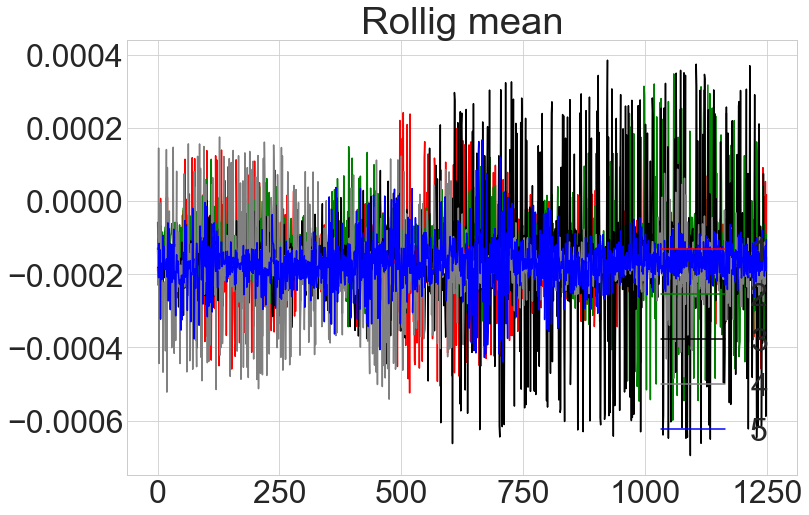

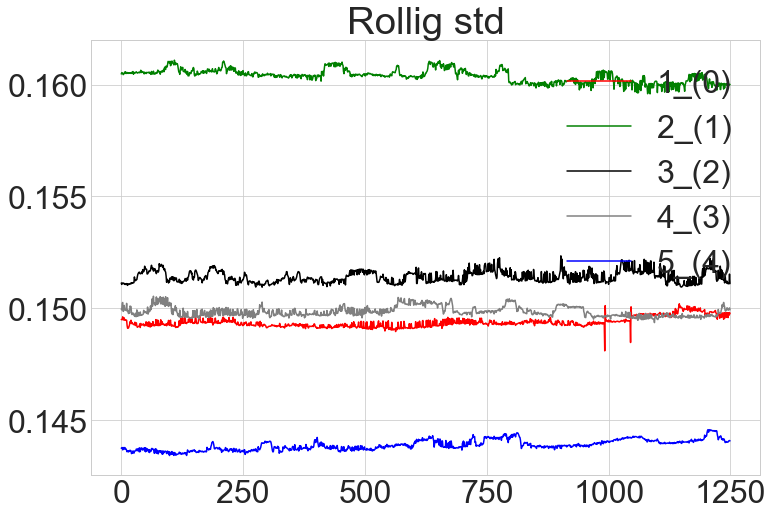

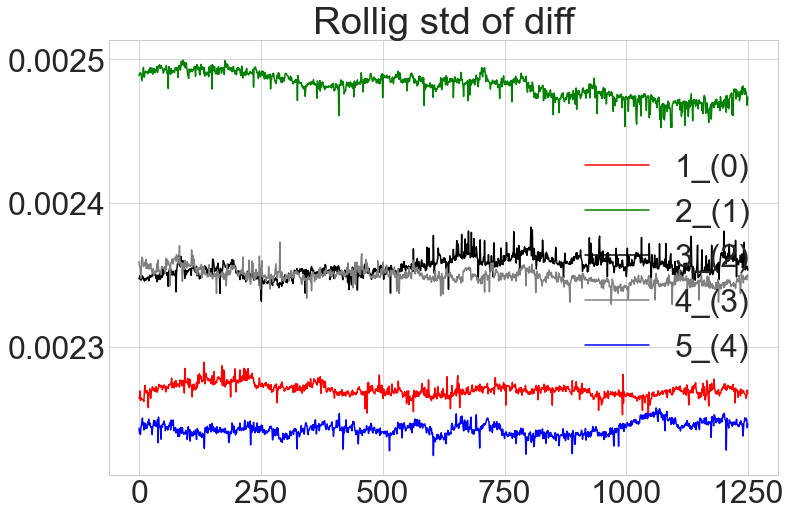

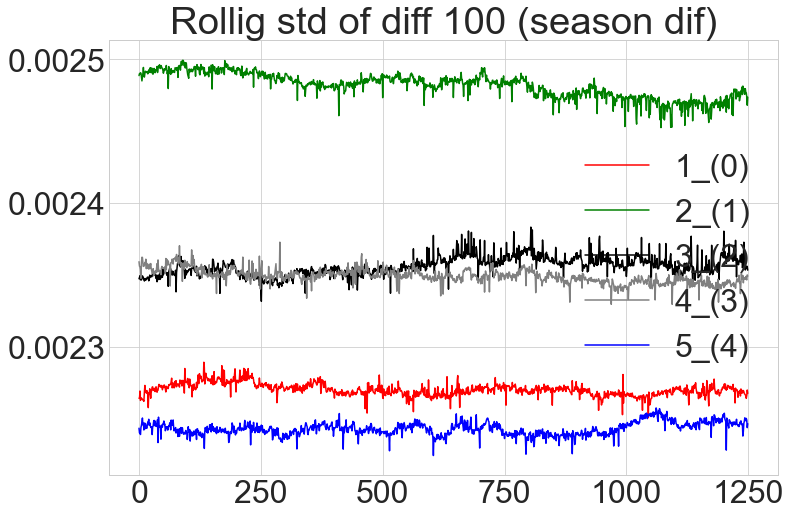

In [29]:
for i, color in enumerate(['red','green','black','gray','blue']):
    plt.plot(signals[i,:,:].mean(axis=1), label = str(i+1), c=color)
plt.legend(); plt.title('Rollig mean')
plt.show();

for i, color in enumerate(['red','green','black','gray','blue']):
    plt.plot(signals[i,:,:].std(axis=1), label = str(i+1)+'_(%d)'%i, c=color)
plt.legend(); plt.title('Rollig std')
plt.show();

for i, color in enumerate(['red','green','black','gray','blue']):
    plt.plot(season_diff(signals[i,:,:]).std(axis=1), label = str(i+1)+'_(%d)'%i, c=color)
plt.legend(); plt.title('Rollig std of diff')
plt.show();


for i, color in enumerate(['red','green','black','gray','blue']):
    plt.plot(season_diff(signals[i,:,:]).std(axis=1), label = str(i+1)+'_(%d)'%i, c=color)
plt.legend(); plt.title('Rollig std of diff 100 (season dif)')
             
plt.show();



# for i, color in enumerate(['red','green','black','gray','blue']):
#     plt.plot(season_diff(season_diff(signals[i,:].reshape(-1,ROLLING_STEP),1),10).std(axis=1), label = str(i+1)+'_(%d)'%i, c=color)
# plt.legend(); plt.title('Rollig std of season diff')
# plt.show();

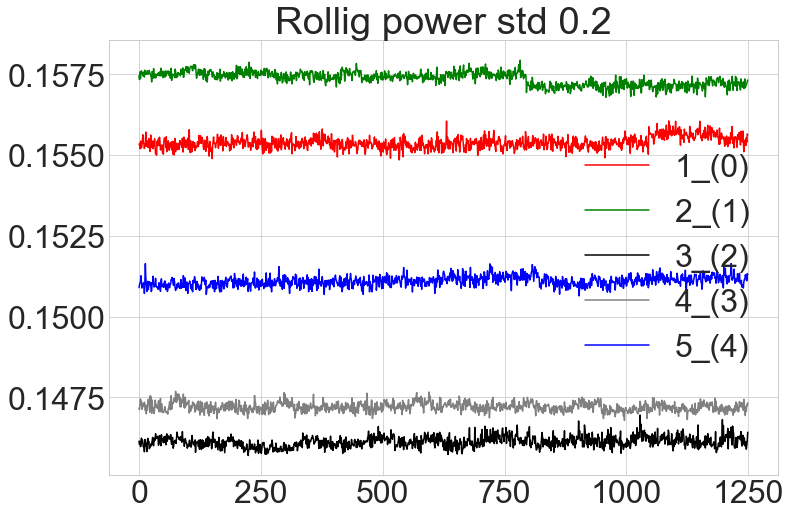

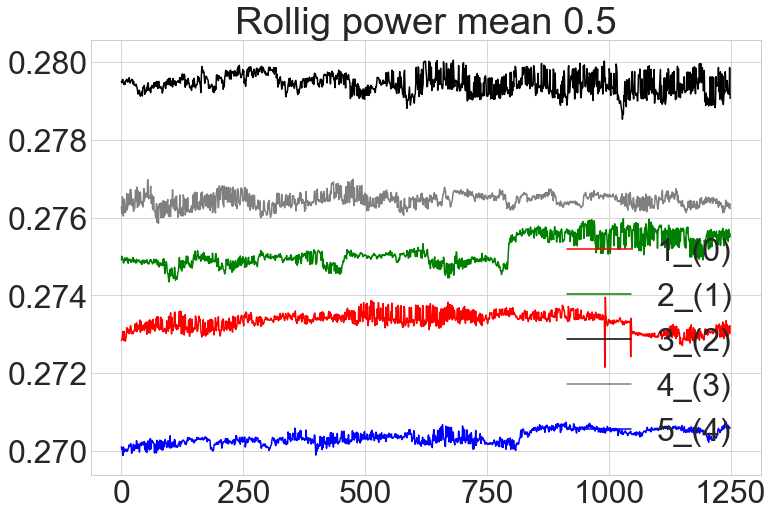

In [30]:
DEGREE = 0.2

for i, color in enumerate(['red','green','black','gray','blue']):
    plt.plot(np.power(np.abs(signals[i,:,:]),DEGREE).std(axis=1), label = str(i+1)+'_(%d)'%i, c=color)
plt.legend(); plt.title('Rollig power std %.1f'%DEGREE)
plt.show();

DEGREE = 0.5

for i, color in enumerate(['red','green','black','gray','blue']):
    plt.plot(np.power(np.abs(signals[i,:,:]),DEGREE).mean(axis=1), label = str(i+1)+'_(%d)'%i, c=color)
plt.legend(); plt.title('Rollig power mean %.1f'%DEGREE)
plt.show();

So, all the signals have different variance, expect 4,1!

However, they have different variance of derivatives !

In additional signals 4,1  have almost the same mean value of power transformed samples!

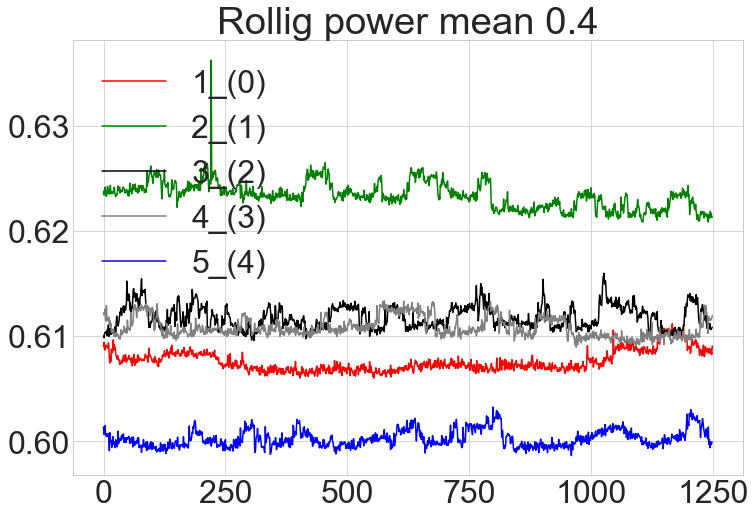

In [31]:
DEGREE = 0.4

for i, color in enumerate(['red','green','black','gray','blue']):
    plt.plot(np.max(np.power(np.abs(season_diff(signals[i,:,:],100)),DEGREE),axis=1), label = str(i+1)+'_(%d)'%i, c=color)
plt.legend(); plt.title('Rollig power mean %.1f'%DEGREE)
plt.show();

### Frequency analysis

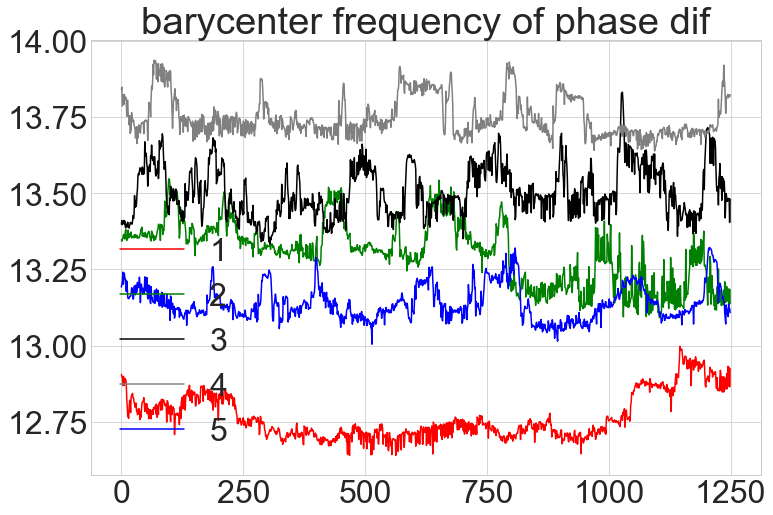

In [32]:
frequency = np.zeros((5,signals.shape[1]))

for i, color in enumerate(['red','green','black','gray','blue']):
    
    analytic = signals[i,:,:]

    for j,sig in enumerate(analytic):
        frequency[i,j] = dsatools.frequency.barycenter_fft(sig[1:]*sig[:-1])

    plt.plot(frequency[i,:], label = str(i+1), c=color)

plt.legend(); plt.title('barycenter frequency of phase dif')
plt.show();

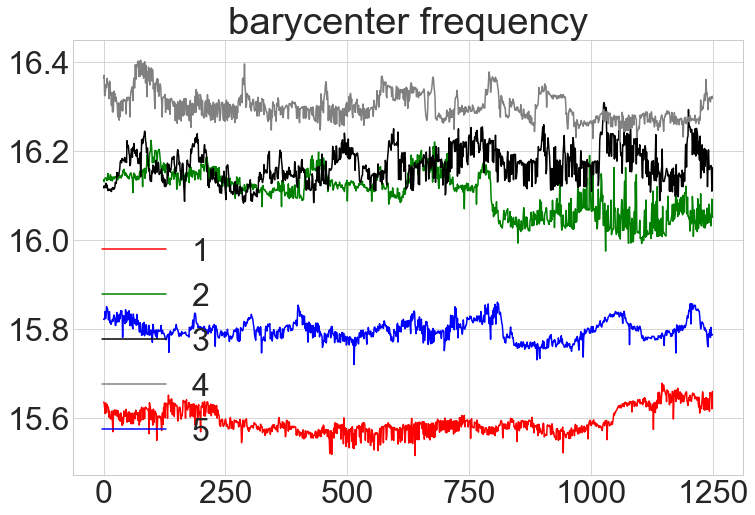

In [33]:
frequency = np.zeros((5,signals.shape[1]))

for i, color in enumerate(['red','green','black','gray','blue']):
    
    analytic = signals[i,:,:]

    for j,sig in enumerate(analytic):
        frequency[i,j] = dsatools.frequency.barycenter_fft(sig[:])

    plt.plot(frequency[i,:], label = str(i+1), c=color)

plt.legend(); plt.title('barycenter frequency')
plt.show();

### Formal features analysis

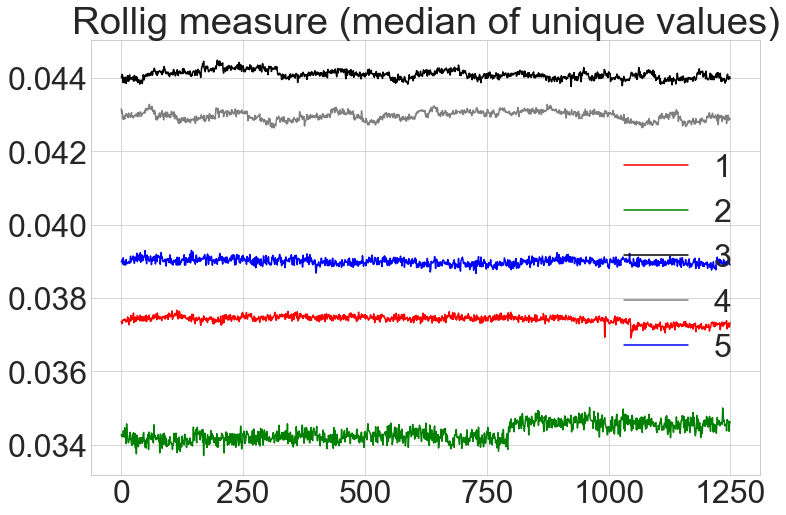

In [34]:
measure = np.zeros((5,signals.shape[1]))

for i, color in enumerate(['red','green','black','gray','blue']):

    analytic = signals[i,:,:]

    for j,sig in enumerate(analytic):

        val,count = np.unique(np.abs(sig),return_counts=True)
        measure[i,j] = np.median(val)

    plt.plot(measure[i,:], label = str(i+1), c=color)

plt.legend(); plt.title('Rollig measure (median of unique values)')
plt.show();



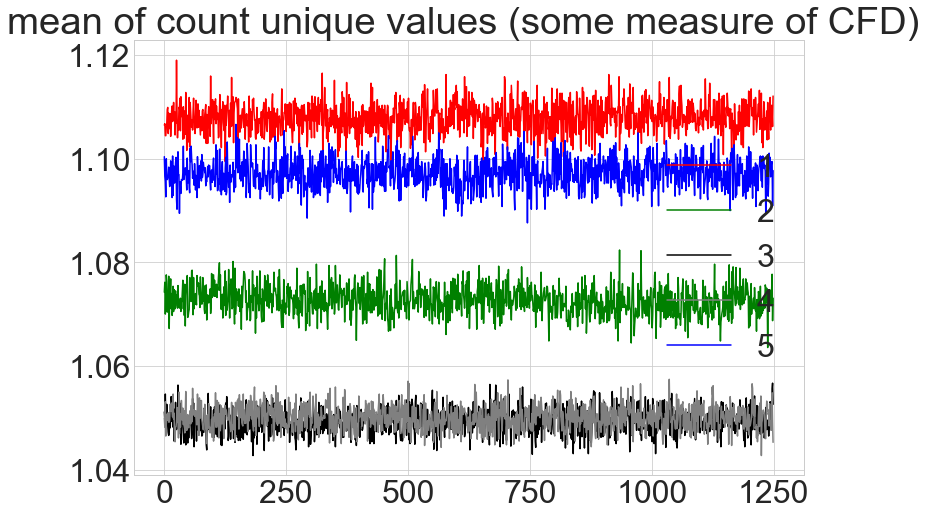

In [35]:
measure = np.zeros((5,signals.shape[1]))

for i, color in enumerate(['red','green','black','gray','blue']):

    analytic = signals[i,:,:]

    for j,sig in enumerate(analytic):

        val,count = np.unique(np.abs(sig),return_counts=True)
        measure[i,j] = np.mean(count)

    plt.plot(measure[i,:], label = str(i+1), c=color)

plt.legend(); plt.title('mean of count unique values (some measure of CFD) ')
plt.show();

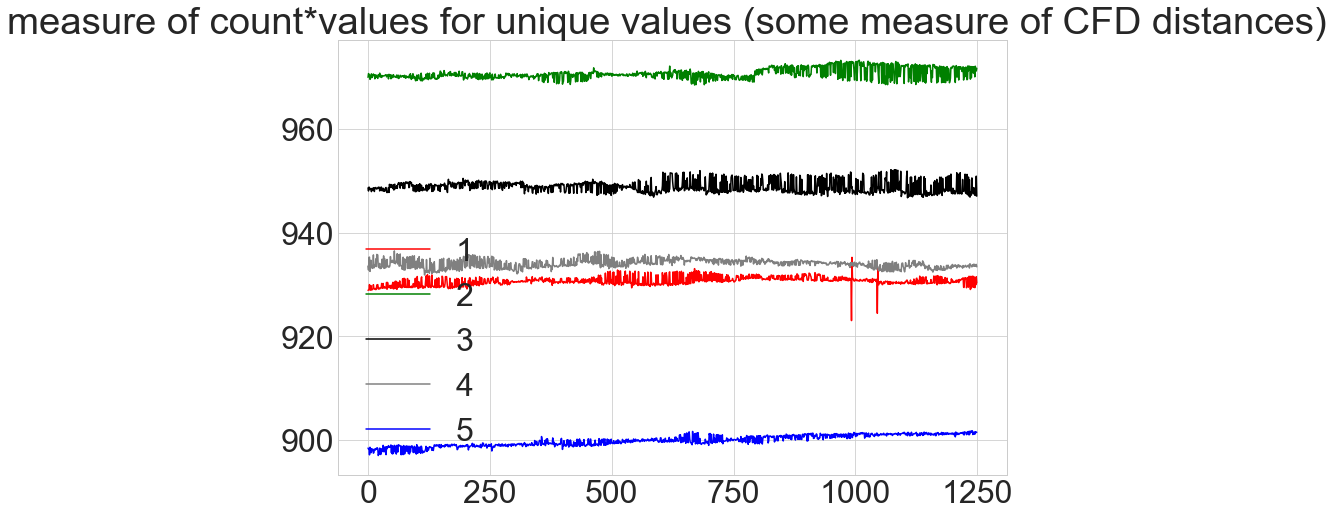

In [36]:
measure = np.zeros((5,signals.shape[1]))

for i, color in enumerate(['red','green','black','gray','blue']):

    analytic = signals[i,:,:]

    for j,sig in enumerate(analytic):

        val,count = np.unique(np.abs(sig[1:]),return_counts=True)
        measure[i,j] = np.sum(count*val)

    plt.plot(measure[i,:], label = str(i+1), c=color)

plt.legend(); plt.title('measure of count*values for unique values (some measure of CFD distances) ')
plt.show();

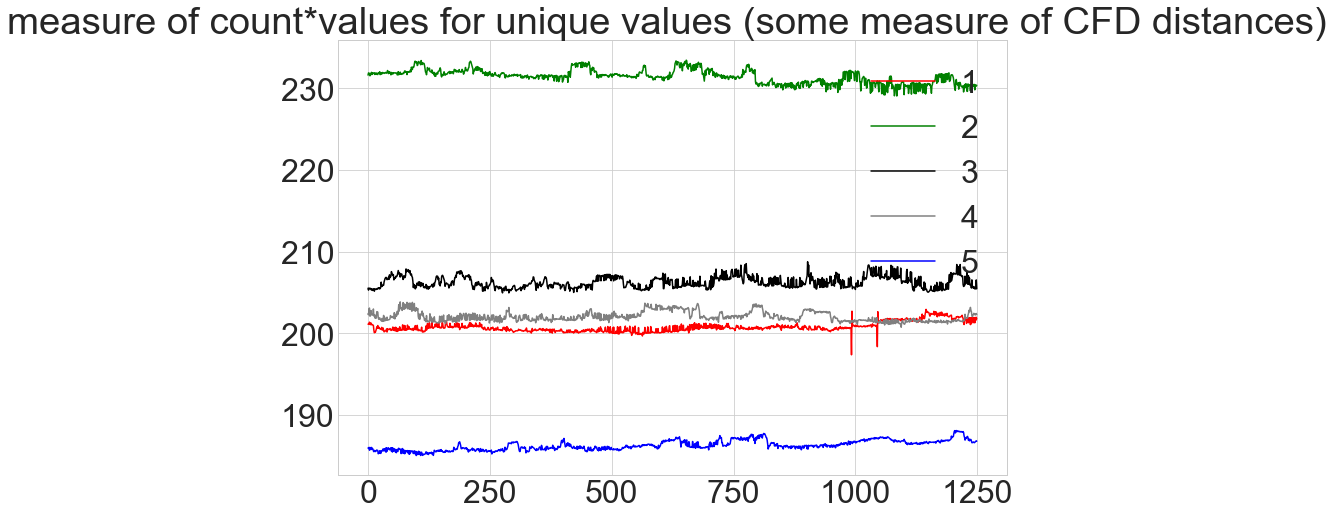

In [37]:
measure = np.zeros((5,signals.shape[1]))

for i, color in enumerate(['red','green','black','gray','blue']):

    analytic = signals[i,:,:]

    for j,sig in enumerate(analytic):

        val,count = np.unique(np.abs(sig[1:]*sig[:-1]),return_counts=True)
        measure[i,j] = np.sum(count*val)

    plt.plot(measure[i,:], label = str(i+1), c=color)

plt.legend(); plt.title('measure of count*values for unique values (some measure of CFD distances) ')
plt.show();

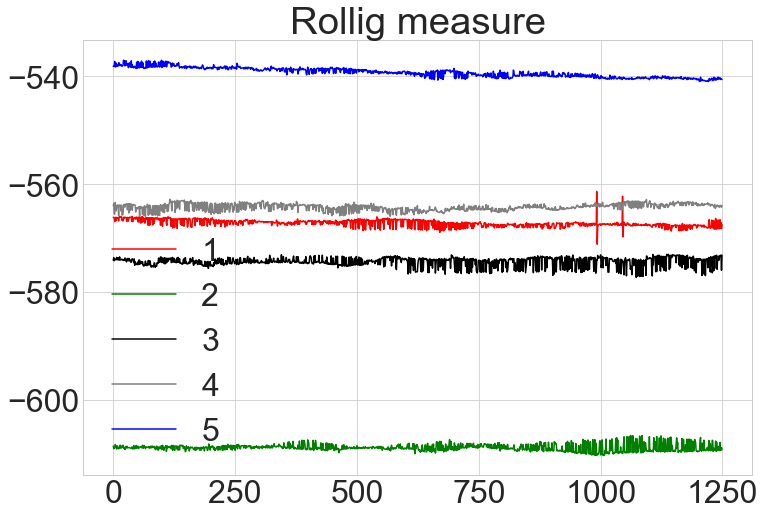

In [38]:
measure = np.zeros((5,signals.shape[1]))

for i, color in enumerate(['red','green','black','gray','blue']):
#     
    analytic = signals[i,:,:]

    for j,sig in enumerate(analytic):
        measure[i,j] = dsatools.distances.entropy(np.abs(sig[1:]*sig[:-1]))
        

    plt.plot(measure[i,:], label = str(i+1), c=color)

plt.legend(); plt.title('Rollig measure')
plt.show();

### Component analysis

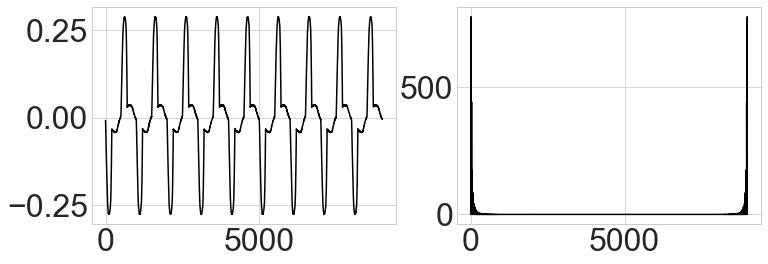

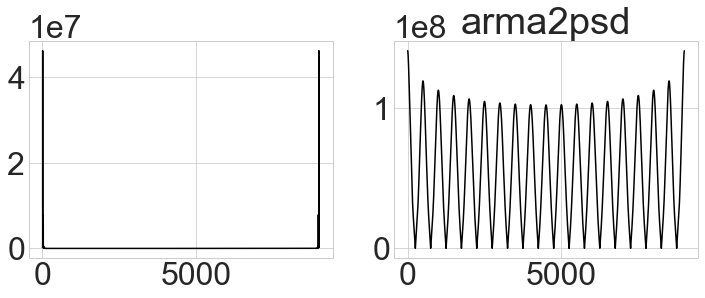

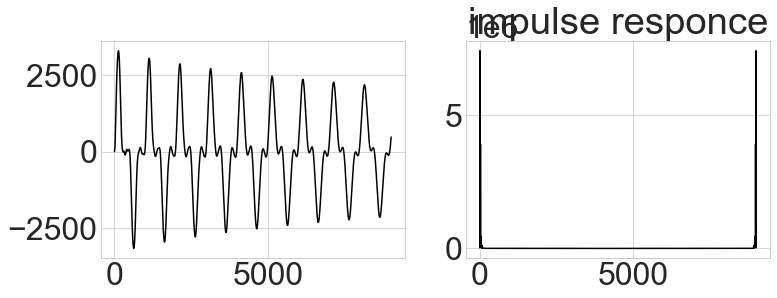

In [39]:
order = 260
signal1 =  signals[i,:,:][0]

ut.probe(signal1);plt.show()

a,err=dsatools.arma.ar_burg_covar(signal1,order, mode='full', unbias=False)

ut.probe(np.sqrt(dsatools.arma.arma2psd(a,b=1,err=1,n_psd=signal1.size)), title='arma2psd')
ut.probe(dsatools.arma.arma2impresponce(a,b=1, n_samples=signal1.size), title='impulse responce')
    


In [40]:
def get_ar(signals, order):
    a = np.zeros((signals.shape[0], order+1),dtype=complex)
    for i in range(signals.shape[0]): 
        
        a[i,:],err=dsatools.arma.ar_burg(signals[i,:],order)
    return a.real

In [41]:
signals[0,:,1:].shape

(1250, 8999)

In [42]:
order_ar = 1
season = [100]
ayw0 = get_ar(season_diff(signals[0,:],season), order_ar)
ayw1 = get_ar(season_diff(signals[1,:],season), order_ar)
ayw2 = get_ar(season_diff(signals[2,:],season), order_ar)
ayw3 = get_ar(season_diff(signals[3,:],season), order_ar)
ayw4 = get_ar(season_diff(signals[4,:],season), order_ar)


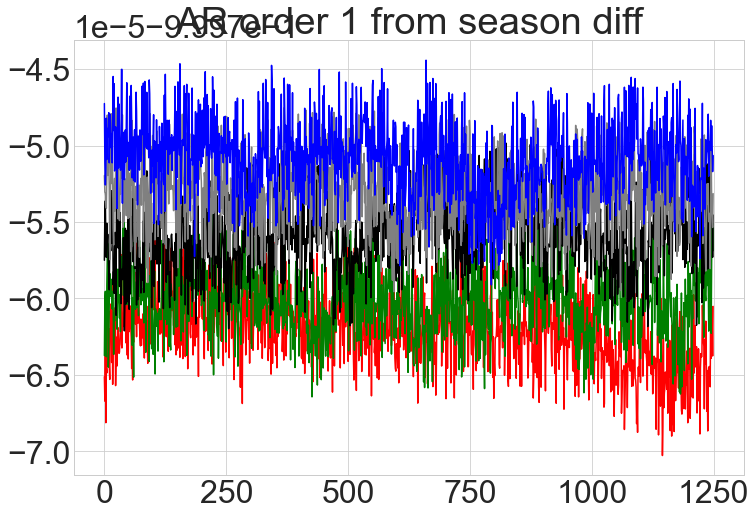

In [43]:
idx_coef = 1
plt.plot(ayw0[:,idx_coef], c='red' )
plt.plot(ayw1[:,idx_coef], c='green' )
plt.plot(ayw2[:,idx_coef], c='black' )
plt.plot(ayw3[:,idx_coef], c='gray' )
plt.plot(ayw4[:,idx_coef], c='blue' )
plt.title('AR order 1 from season diff');plt.show()

In [44]:
order_ar = 1

ayw0 = get_ar((signals[0,:,1:]*signals[0,:,:-1]), order_ar)
ayw1 = get_ar((signals[1,:,1:]*signals[1,:,:-1]), order_ar)
ayw2 = get_ar((signals[2,:,1:]*signals[2,:,:-1]), order_ar)
ayw3 = get_ar((signals[3,:,1:]*signals[3,:,:-1]), order_ar)
ayw4 = get_ar((signals[4,:,1:]*signals[4,:,:-1]), order_ar)


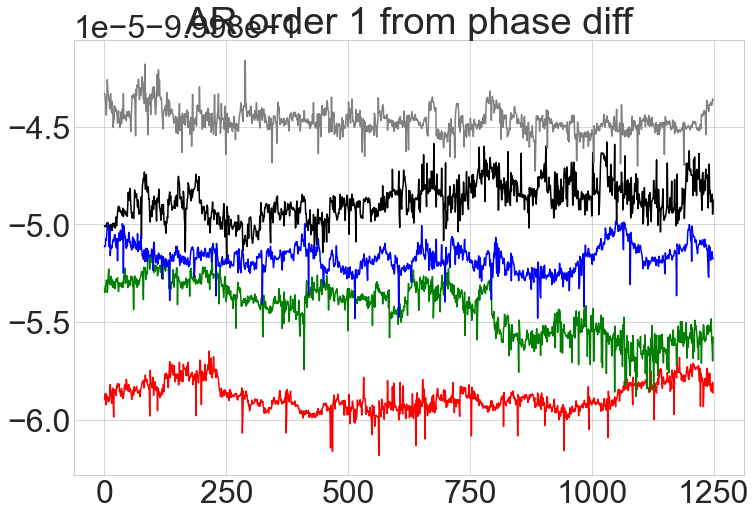

In [45]:
idx_coef = 1
plt.plot(ayw0[:,idx_coef], c='red' )
plt.plot(ayw1[:,idx_coef], c='green' )
plt.plot(ayw2[:,idx_coef], c='black' )
plt.plot(ayw3[:,idx_coef], c='gray' )
plt.plot(ayw4[:,idx_coef], c='blue' )
plt.title('AR order 1 from phase diff');plt.show()

In [46]:
order_ar = 1

ayw0 = get_ar((signals[0,:,:]), order_ar)
ayw1 = get_ar((signals[1,:,:]), order_ar)
ayw2 = get_ar((signals[2,:,:]), order_ar)
ayw3 = get_ar((signals[3,:,:]), order_ar)
ayw4 = get_ar((signals[4,:,:]), order_ar)



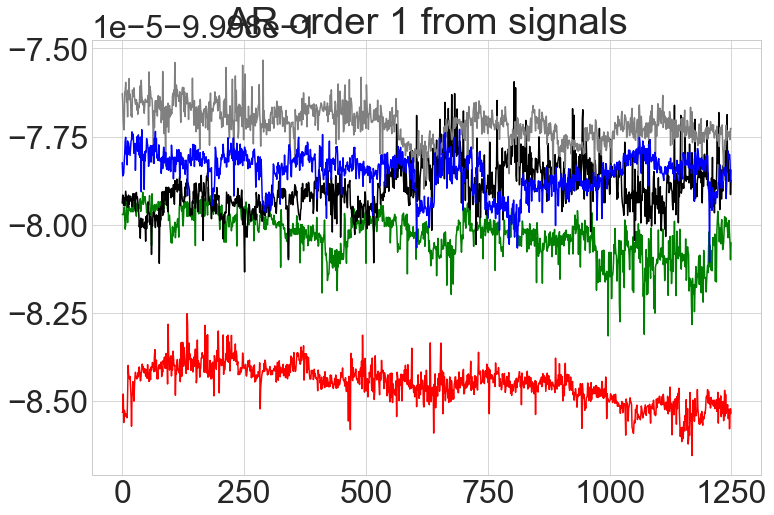

In [47]:
idx_coef = 1
plt.plot(ayw0[:,idx_coef], c='red' )
plt.plot(ayw1[:,idx_coef], c='green' )
plt.plot(ayw2[:,idx_coef], c='black' )
plt.plot(ayw3[:,idx_coef], c='gray' )
plt.plot(ayw4[:,idx_coef], c='blue' )
plt.title('AR order 1 from signals');plt.show()

Let's create dataset from 1, and 4-th signals

In [48]:
signals[0,0,:].shape

(9000,)

0
-6.316309738327884
-6.309118395235853
-6.295354046399073
-6.282896927838432
-6.294177328785107
1
-6.067455302510949
-6.074500567598151
-6.10982547349008
-6.073048143133046
-6.083034185814015
2
-6.113150376457459
-6.113401722328286
-6.303063007097212
-6.1382845851859305
-6.2838072768038895
3
-6.093433980210637
-6.332150692723442
-6.104845704651861
-6.09748126506371
-6.1136116664321865
4
-6.242673045925059
-6.24338935668521
-6.247207960327755
-6.249013682856282
-6.25150424996821


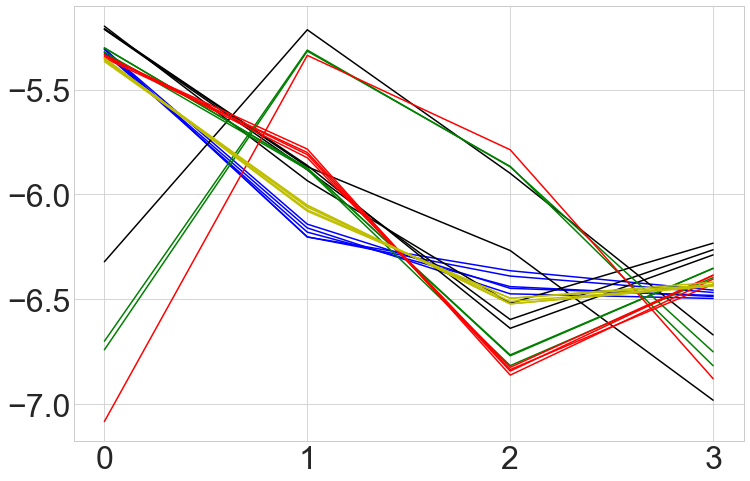

In [49]:
order =20
f = lambda x:np.mean(np.log(np.abs(x)),axis=1)

fp,lp = 1,5

c = 0
color = 'b'
for c,color in zip(range(5),['b','k','g','r','y']):
    print(c)
    for idx in [0,10,1000,-1000,-1]:
        s = dsatools.decomposition.ewt(signals[c,idx,:],order=order)
        plt.plot(f(s[fp:lp]),color)
        print(np.median(f(s[fp:lp])))




In [50]:
# measure = np.zeros((5,signals.shape[1]))

# order_ewt = 20
# fp_ewt,lp_ewt = 1,5

# f = lambda x:np.median(np.mean(np.log(np.abs(x)),axis=1))



# for i, color in enumerate(['red','green','black','gray','blue']):
# #     
#     analytic = signals[i,:,:]

#     for j,sig in enumerate(analytic):
#         measure[i,j] = f(dsatools.decomposition.ewt(sig,order=order_ewt)[fp_ewt:lp_ewt])
        

#     plt.plot(measure[i,:], label = str(i+1), c=color)

# plt.legend(); plt.title('entropy-like measure')
# plt.show();

In [51]:
# X = np.vstack((signals[3, :, :],   
#                signals[2, :, :] ))

# y = np.hstack((4*np.ones(signals[3, :, :].shape[0]),
#                1*np.ones(signals[2, :, :].shape[0]) ))
              
# print(X.shape, y.shape)              

In [52]:
# from sklearn.decomposition import PCA

# n_components = 8

# pca = PCA(n_components=n_components)
# x_pca  = pca.fit_transform(X)
# print(x_pca.shape)

# for j in range(n_components):
#     print(j)
#     fig,axs = plt.subplots(n_components//2,2,figsize=(18,8))
#     for i in range(n_components):
#         col = i//2
#         raw = i - col*2
#         axs[col,raw].scatter(x_pca[:,j],x_pca[:,i], c=y); axs[col,raw].set_title(str(j)+'-'+str(i))
#     fig.tight_layout(pad=3.0)
#     plt.show();

## Classification

First we create dataset of row signals

In [53]:
step = 10000

size = 9000

In [103]:
signal1 = data['current1']
signal2 = data['current2']
signal3 = data['current3']
signal4 = data['current4']
signal5 = data['current5']

signals_ = np.zeros((5,signal1.size))

signals_[0,:] = signal1[::].reshape(-1)
signals_[1,:] = signal2[::].reshape(-1)
signals_[2,:] = signal3[::].reshape(-1)
signals_[3,:] = signal4[::].reshape(-1)
signals_[4,:] = signal5[::].reshape(-1)




In [104]:
X = make_segments(signals_[0,:], size, step, random_seed = 42 )
y = np.zeros(X.shape[0])

for i in range(1,5):
    segments =  make_segments(signals_[i,:], size, step, random_seed = 42 ) 
    X = np.vstack((X, segments))
    y = np.hstack((y, i*np.ones(segments.shape[0]) ))

print(X.shape, y.shape)  

(6250, 9000) (6250,)


then function for feature extraction

In [105]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score, mean_squared_error as MSE, log_loss,r2_score

import xgboost as xgb



In [106]:
ROLLING_STEP = 1000
SEASON = [1000]
ORDER_AR = 1
# pca = PCA(n_components=n_components)
AR_IDX = 1
# pca.fit(np.vstack((signals[3, :].reshape(-1,ROLLING_STEP),   
#                    signals[0, :].reshape(-1,ROLLING_STEP) )))

def feature_extraction(signals_,y):
    signals = np.zeros_like(signals_)
    for j,sig in enumerate(signals_):
        signals[j] = ut.correlation(sig)
    
    df = pd.DataFrame()
    
    df['$mean$'] = np.mean(signals,axis=1)
    df['$std$'] = np.std(signals,axis=1)
    df['$std \ dif$'] = season_diff(signals.copy(),1).std(axis=1)
    df['$std \ dif_s$'] = season_diff(signals.copy(),SEASON).std(axis=1)
#     df['mean power 0.25'] = np.power(np.abs(signals),0.5).mean(axis=1)
#     df['std power 0.1']   = np.power(np.abs(signals),0.2).std(axis=1)

    df['$ar \ dif$'] = get_ar(signals[:,1:]-signals[:,:-1], ORDER_AR)[:,AR_IDX]
    df['$ar$'] = get_ar(signals[:,:], ORDER_AR)[:,AR_IDX]
    
    frequency   = np.zeros(signals.shape[0])
    freq_phdif  = np.zeros(signals.shape[0])
    measure     = np.zeros(signals.shape[0])
    measure2    = np.zeros(signals.shape[0])
    entropy     = np.zeros(signals.shape[0])
    
    for j,sig in enumerate(signals):
        frequency[j]  = dsatools.frequency.barycenter_fft(sig) 
        freq_phdif[j] = dsatools.frequency.barycenter_fft(sig[1:]-sig[:-1])
        val,count      = np.unique(np.abs(sig),return_counts=True)
        measure[j]     = np.median(val)
        
#         measure2[j]    = np.sum(np.abs(ut.afft(sig)**2))
        h,bins = ut.hist(np.abs(sig))
        
        entropy[j] = bins[np.argmax(h)]
    
    df['$B.F.$'] = frequency
#     df['barycetner_f__ph_dif'] = freq_phdif
    df['$M.U.V.$'] = measure
#     df['''entropy-like'''] = entropy[j]
#     df['entropy'] = entropy
    
#     x_pca  = pca.transform(signals)
    
#     df['pca_0'] = x_pca[:,0]
#     df['pca_4'] = x_pca[:,4]
#     df['pca_5'] = x_pca[:,5]
    
    df['$class$'] = y.astype(int)
    
    return df

In [107]:
df = feature_extraction(X, y)

In [108]:
df

$mean$     $std$  $std \ dif$  $std \ dif_s$  $ar \ dif$      $ar$  \
0     0.000001  0.006908     0.000059       0.001330   -0.999882 -0.999964   
1     0.000001  0.006908     0.000059       0.001331   -0.999883 -0.999964   
2     0.000001  0.006910     0.000059       0.001331   -0.999883 -0.999964   
3     0.000001  0.006921     0.000059       0.001332   -0.999882 -0.999964   
4     0.000001  0.006908     0.000059       0.001330   -0.999882 -0.999964   
...        ...       ...          ...            ...         ...       ...   
6245  0.000001  0.006403     0.000054       0.001230   -0.999880 -0.999964   
6246  0.000001  0.006400     0.000054       0.001231   -0.999880 -0.999964   
6247  0.000001  0.006405     0.000054       0.001231   -0.999880 -0.999964   
6248  0.000001  0.006406     0.000054       0.001231   -0.999880 -0.999964   
6249  0.000001  0.006405     0.000054       0.001231   -0.999880 -0.999964   

         $B.F.$  $M.U.V.$  $class$  
0     13.892633  0.002398        0  
1     13.895854  0.002401        0  
2     13.890157  0.002405        0  
3     13.875704  0.002423        0  
4     13.888674  0.002400        0  
...         ...       ...      ...  
6245  13.868219  0.002247        4  
6246  13.866074  0.002247        4  
6247  13.882764  0.002246        4  
6248  13.878612  0.002244        4  
6249  13.882901  0.002243        4  

[6250 rows x 9 columns]

In [109]:
n_features = df.shape[1]-1
columns = df.columns

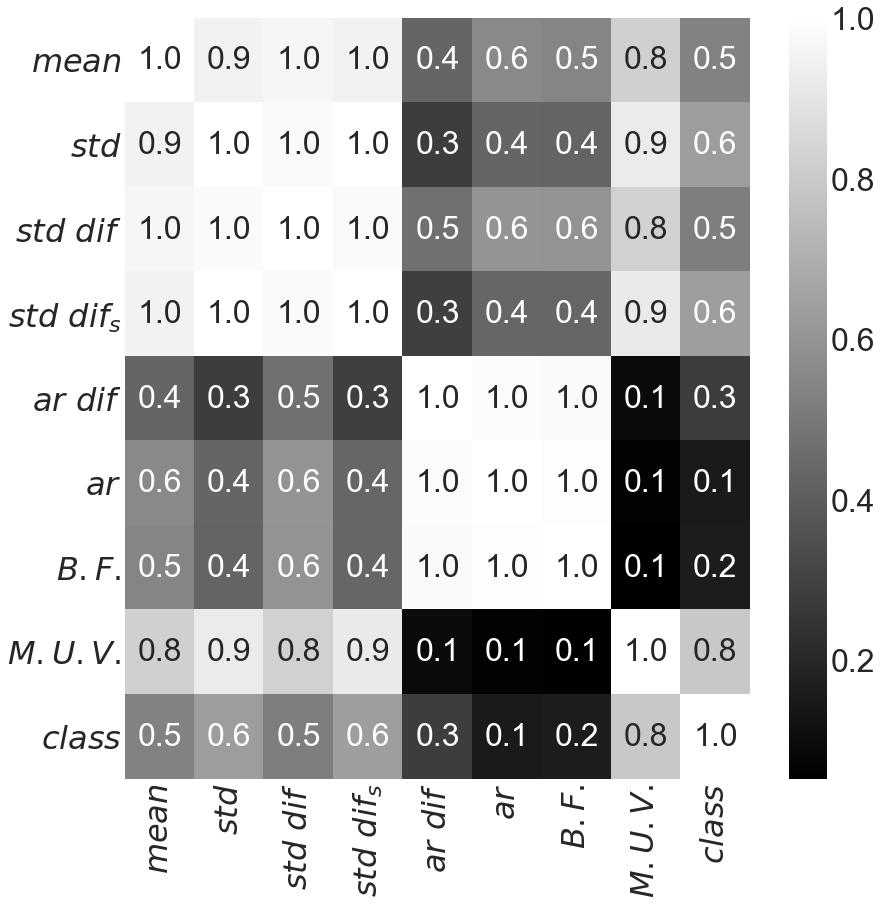

In [127]:
fig, ax = plt.subplots(figsize=(14,14))
# plt.title('Correlation map', fontsize = 32)
sns.heatmap(df.corr().abs(), annot=True, fmt='.1f', cmap="gist_gray",annot_kws={"size": 32});

plt.savefig('heat_map_cor.pdf', dpi=120, format='pdf', bbox_inches='tight', cmap='gray')
plt.show()

# legend = plt.legend(ncol = 1, fontsize = 32, frameon = 1)
# frame = legend.get_frame()
# frame.set_color('white')
# plt.savefig('typical_signal_spectrum-autocor.pdf', dpi=120, format='pdf', bbox_inches='tight')
# plt.show()

---

---

we can drop `std_of_diff` and `entropy_dif` column due to the high correlation with other similar ones


In [128]:
df = df.drop(columns=['$ar \ dif$','$std \ dif_s$','$std \ dif$','$ar$'])

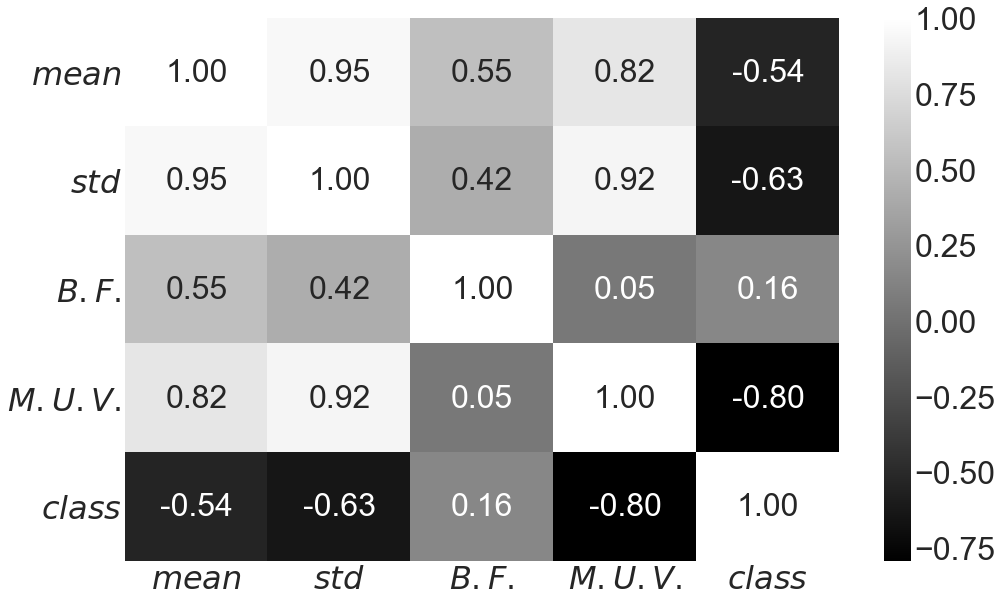

In [129]:
fig, ax = plt.subplots(figsize=(16,10))
# plt.title('Filtered correlation map', fontsize = 32)
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap="gray",annot_kws={"size": 32});
plt.savefig('heat_map_cor_2.pdf', dpi=120, format='pdf', bbox_inches='tight')
plt.show()

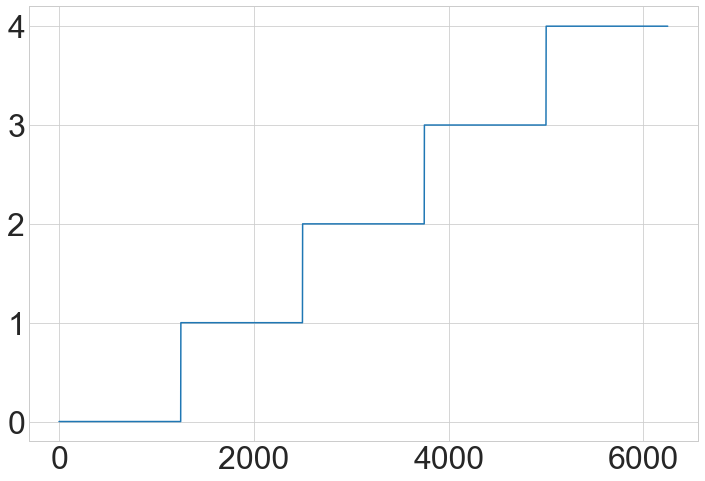

In [64]:
plt.plot(y)

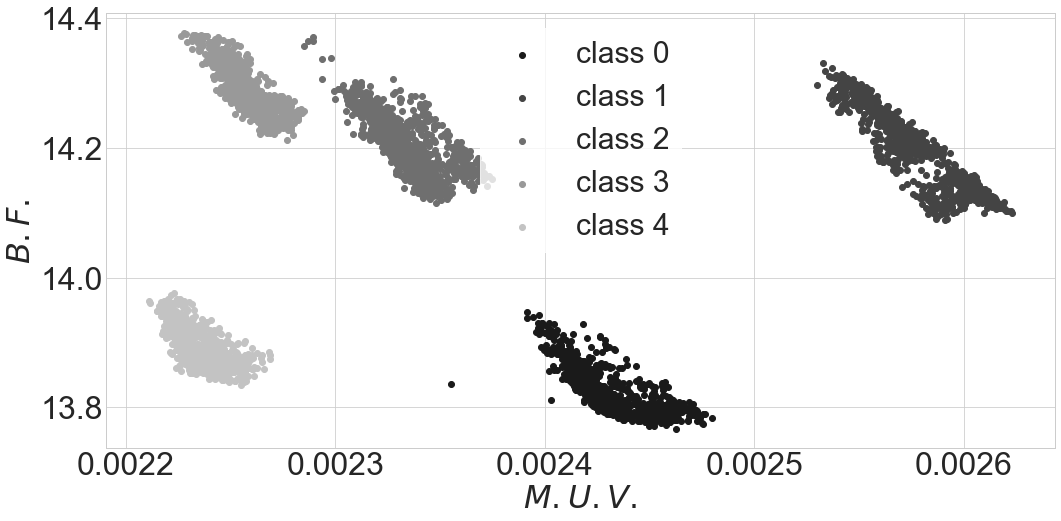

In [142]:
vals1 = df['$M.U.V.$'].values.reshape(-1,1250)
# vals1 = df['std'].values.reshape(-1,1250)
vals2 = df['$B.F.$'].values.reshape(-1,1250)
plt.figure(figsize=(17,8))
for i,(val1,val2) in enumerate (zip(vals1, vals2 )):
    plt.scatter(val1,val2,color=str(i/6+0.1), label = 'class '+str(i));
plt.xlabel('$M.U.V.$', fontsize = 32)
plt.ylabel('$B.F.$', fontsize = 32)
legend = plt.legend(fontsize = 30,  frameon = 1,)
frame = legend.get_frame()
frame.set_color('white')
plt.savefig('med_uniq_vs_barycetner.pdf', dpi=120, format='pdf', bbox_inches='tight')
plt.show()

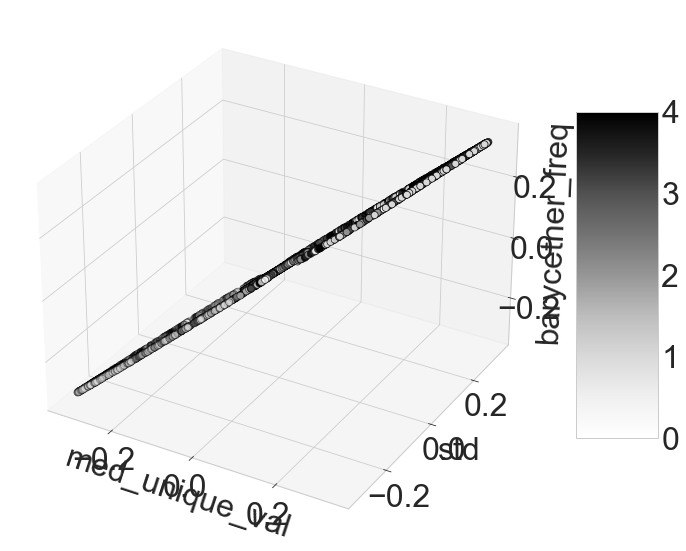

In [66]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

# Generate the values
x_vals = X[:,0]
y_vals = X[:,2]
z_vals = X[:,1]


# Plot the values
plot = ax.scatter(x_vals, y_vals, z_vals, c = y, edgecolor='black', linewidth=0.7, s=50)

ax.set_xlabel('med_unique_val')
ax.set_ylabel('std')
ax.set_zlabel('barycetner_freq')

fig.colorbar(plot, shrink=0.5, aspect=4)

plt.show()

<AxesSubplot:>

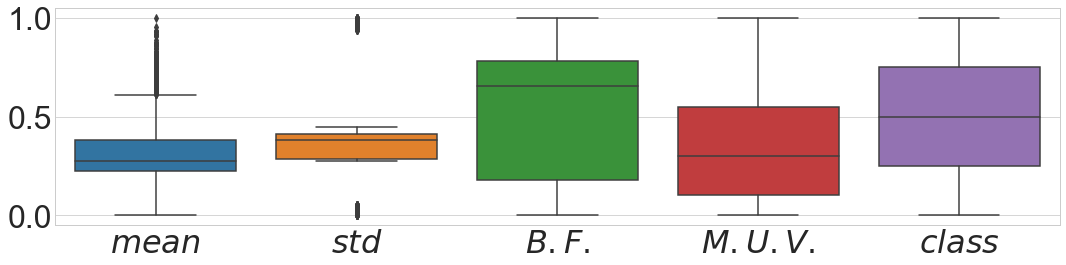

In [67]:
scaler = MinMaxScaler()
x_sacled = scaler.fit_transform(df)
df_test = pd.DataFrame(x_sacled, columns = df.columns)
fig = plt.figure(figsize=(18,4))
sns.boxplot(data =df_test,)

STD values have several anomalies 

In [68]:
# std_anomalies = df[(df_test['std'] <0.2)  | (df_test['std'] > 0.8) ]
# df1 = df.drop(std_anomalies.index)
# print(std_anomalies.shape)
# df1['class'].plot();plt.show()


# std_anomalies = df[(df_test['std'] <0.2)  ]
# print(std_anomalies.shape)
# df1 = df.drop(std_anomalies.index)
# df1['class'].plot();plt.show()

# std_anomalies = df[(df_test['std'] >0.8)  ]
# df1 = df.drop(std_anomalies.index)
# print(std_anomalies.shape)
# df1['class'].plot();plt.show()

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6250 entries, 0 to 6249
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   $mean$    6250 non-null   float64
 1   $std$     6250 non-null   float64
 2   $B.F.$    6250 non-null   float64
 3   $M.U.V.$  6250 non-null   float64
 4   $class$   6250 non-null   int32  
dtypes: float64(4), int32(1)
memory usage: 219.9 KB


Probably we do not need to drop anomalies due to its high amount

In [72]:
X = df.drop(columns=["$class$"]).astype('float32').values
y = df["$class$"].values.astype(int)          

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [73]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [74]:
xgBoost = xgb.XGBClassifier(random_state=42, label_encoder=False)
knn     = KNeighborsClassifier(n_neighbors=3)
svc     = SVC(probability=True,random_state=42)
randomForest = RandomForestClassifier(random_state=42)
adaBoost     = AdaBoostClassifier(random_state=42)
nb           = GaussianNB()


models =  ((xgBoost,"XGBoost Classifier"),
           (knn,"KNN Classifier"),
           (svc,"SVC Classifier"),
           (randomForest,"Random Forest Classifier"),
           (adaBoost,"AdaBoost Classifier"),
           (nb,"Naive Bayes Classifier"))


for model,name in models:
    
    model.fit(X_train,y_train)
    print(name)
    print(f"Accuracy of {name}:\t {model.score(X_test,y_test)}")

[14:37:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "label_encoder" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:37:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Classifier
Accuracy of XGBoost Classifier:	 0.9994666666666666
KNN Classifier
Accuracy of KNN Classifier:	 1.0
SVC Classifier
Accuracy of SVC Classifier:	 1.0
Random Forest Classifier
Accuracy of Random Forest Classifier:	 1.0
AdaBoost Classifier
Accuracy of 

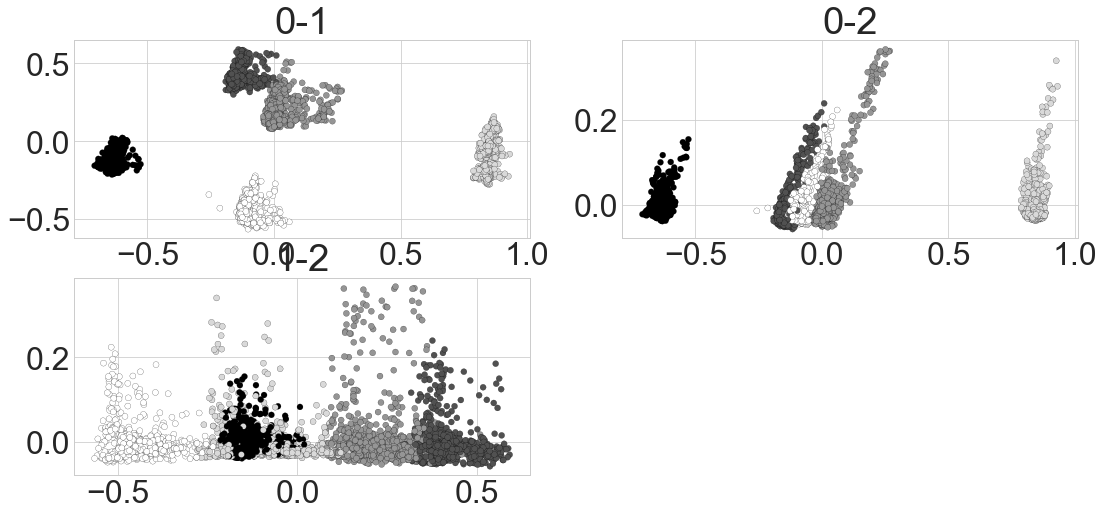

In [75]:
from sklearn.decomposition import PCA

x_pca  = PCA(n_components=3).fit_transform(X_train)
x_pca.shape

plt.figure(figsize=(18,8))
plt.subplot(221); plt.scatter(x_pca[:,0],x_pca[:,1],c=y_train, edgecolor='black', linewidth=0.2); plt.title("0-1")
plt.subplot(222); plt.scatter(x_pca[:,0],x_pca[:,2],c=y_train, edgecolor='black', linewidth=0.2); plt.title("0-2")
plt.subplot(223); plt.scatter(x_pca[:,1],x_pca[:,2],c=y_train, edgecolor='black', linewidth=0.2); plt.title("1-2")
plt.show();

We can suppose that we can rest only some features

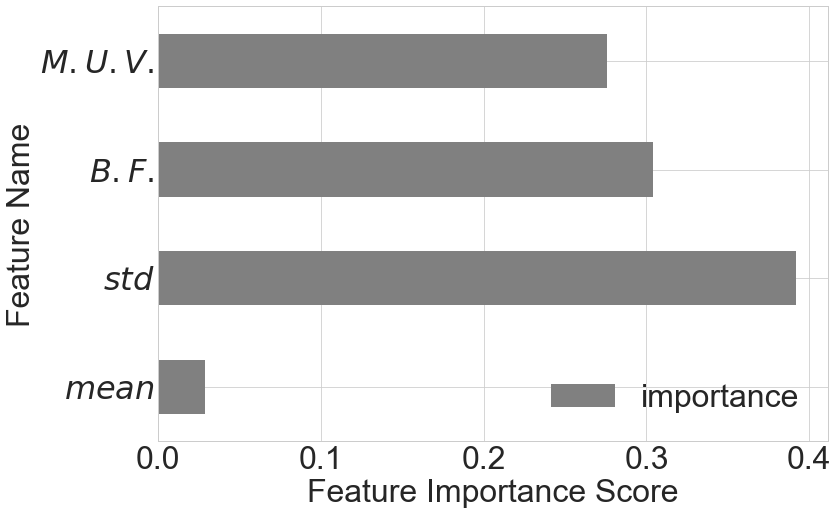

Index(['$mean$', '$std$', '$B.F.$', '$M.U.V.$', '$class$'], dtype='object')

In [131]:
feat_imp = pd.DataFrame({'importance':models[0][0].feature_importances_}) 

feat_imp['feature'] = df.columns[:-1]

feat_imp = feat_imp.set_index('feature', drop=True)

feat_imp.plot.barh(color='grey')
# plt.title("XGBoost feature importance")
plt.xlabel('Feature Importance Score', fontsize = 32)
plt.ylabel('Feature Name', fontsize = 32)
plt.savefig('XGB_feautre_importance.pdf', dpi=120, format='pdf', bbox_inches='tight')
plt.show()

df.columns

we can restrict or model by ar coefficient, mean_power  std values and barycenter frequency

In [ ]:
# X = df[['sum_unique_vals', 'barycetner freq','std','mean']].values
# y = df["class"].values          

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

scaler  = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)
X       = scaler.transform(X)

for model,name in models:
    model.fit(X_train,y_train)
    print(f"Accuracy of {name}:\t {model.score(X_test,y_test)}")

In [ ]:
df

In [ ]:
# from sklearn.decomposition import PCA

# x_pca  = pca.transform(X)
# print(x_pca.shape)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

# Generate the values
x_vals = X[:,1]
y_vals = X[:,3]
z_vals = X[:,2]


# Plot the values
plot = ax.scatter(x_vals, y_vals, z_vals, c = y, edgecolor='black', linewidth=0.7, s=50)

ax.set_xlabel('med_unique_val')
ax.set_ylabel('std')
ax.set_zlabel('barycetner_freq')

fig.colorbar(plot, shrink=0.5, aspect=4)

plt.show()

In [ ]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

# Generate the values
x_vals = X[:,1]
y_vals = X[:,0]
# z_vals = X[:,2]


# Plot the values
plot = ax.scatter(x_vals, y_vals, c = y, edgecolor='black', linewidth=0.7, s=50)

ax.set_ylabel('med_unique_val')
ax.set_xlabel('barycetner freq')
# ax.set_zlabel('barycetner_freq')

fig.colorbar(plot, shrink=1, aspect=8,)

plt.show()


In addition we can try to estimate less biased accuracy value by k-fold validation

In [ ]:
from sklearn.model_selection import KFold

n_folds = 10

kf = KFold(n_splits=n_folds)

xgBoost = xgb.XGBClassifier(random_state=42, 
                            n_estimators=3,
                            learning_rate=0.1,
                            max_depth=10,
                            eval_metric='mlogloss')

scores = np.zeros(n_folds)

xgb_list = []

for i,(train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    xgBoost = xgb.XGBClassifier(random_state=42, 
                            n_estimators=3,
                            learning_rate=0.1,
                            max_depth=10,
                            eval_metric='mlogloss')
    
    xgBoost.fit(X_train,y_train)
    
    scores[i] = xgBoost.score(X_test,y_test)
    print(f"Accuracy of {i}-th :\t on test { scores[i]}; for train {xgBoost.score(X_train,y_train)}")
    
    xgb_list += [xgBoost]

xgBoost = xgb_list[np.argmax(scores)]    

In [ ]:
print(xgBoost.score(X_test,y_test))

In [ ]:
plt.plot(scores)

Now we can make test by taking samples form any random position in samples

In [ ]:
signal1 = data['current1']
signal2 = data['current2']
signal3 = data['current3']
signal4 = data['current4']
signal5 = data['current5']

all_size = [sig.size for sig in [signal1,signal2,signal3,signal4,signal5] ]

signals_ = np.zeros((5,max(all_size)))

signals_[0,:] = signal1[::].reshape(-1)
signals_[1,:] = signal2[::].reshape(-1)
signals_[2,:] = signal3[::].reshape(-1)
signals_[3,:] = signal4[::].reshape(-1)
signals_[4,:] = signal5[::].reshape(-1)

print(signals_.shape)

In [ ]:
def feature_extraction(signals_,y):
    signals = np.zeros_like(signals_)
    for j,sig in enumerate(signals_):
        signals[j] = ut.correlation(sig)
    df = pd.DataFrame()
    
    df['std'] = np.std(signals,axis=1)
    df['std dif'] = season_diff(signals.copy(),1).std(axis=1)
#     df['std season dif'] = season_diff(signals.copy(),SEASON).std(axis=1)
#     df['mean power 0.25'] = np.power(np.abs(signals),0.5).mean(axis=1)
#     df['std power 0.1']   = np.power(np.abs(signals),0.2).std(axis=1)

#     df['ar dif'] = get_ar(signals[:,1:]-signals[:,:-1], ORDER_AR)[:,AR_IDX]
#     df['ar'] = get_ar(signals[:,:], ORDER_AR)[:,AR_IDX]
    
    frequency   = np.zeros(signals.shape[0])
    freq_phdif  = np.zeros(signals.shape[0])
    measure     = np.zeros(signals.shape[0])
    measure2    = np.zeros(signals.shape[0])
    entropy     = np.zeros(signals.shape[0])
    
    for j,sig in enumerate(signals):
        frequency[j]  = dsatools.frequency.barycenter_fft(sig) 
        freq_phdif[j] = dsatools.frequency.barycenter_fft(sig[1:]-sig[:-1])
        val,count      = np.unique(np.abs(sig),return_counts=True)
        measure[j]     = np.median(val)
#         measure2[j]    = np.median(val*count)
        entropy[j] = np.sum(count*np.log2(count))
    
    df['barycetner freq'] = frequency
#     df['barycetner_f__ph_dif'] = freq_phdif
#     df['median of unique'] = measure
#     df['entropy'] = entropy
    df['mean'] = np.mean(signals,axis=1)
#     x_pca  = pca.transform(signals)
    
#     df['pca_0'] = x_pca[:,0]
#     df['pca_4'] = x_pca[:,4]
#     df['pca_5'] = x_pca[:,5]
    
#     df['class'] = y.astype(int)
    
    return df


def make_random_test(signals_, signals_size, n_signals):
    
    y = np.zeros(n_signals,dtype=int)
    signals = np.zeros((n_signals, signals_size) )
    for i in range(n_signals):
        c = np.random.randint(0,5)
        idx = np.random.randint(0,signals_[c,:].size - size)
        y[i] = c
        signals[i,:] = signals_[c,idx:idx+size]  
        
    X = feature_extraction(signals,y)

    return X.values,y

In [ ]:
X_test.shape

In [ ]:
X_random_test,y_random_test = make_random_test(signals_, signals_size = size, n_signals = 1000)

print(xgBoost.score(X_test,y_test))

For make the task more hard we can also try to take all samples for train with the same phase (with uniform step), and all the samples for test at random within one period.

In [ ]:
step = 10000
size = 9000

max_step = step - size



In [ ]:
signal1 = data['current1']
signal2 = data['current2']
signal3 = data['current3']
signal4 = data['current4']
signal5 = data['current5']

all_size = [sig.size for sig in [signal1,signal2,signal3,signal4,signal5] ]

signals = np.zeros((5,signal1.size//step,step))

signals[0,:,:] = signal1[::].reshape(-1).reshape(-1,step)
signals[1,:,:] = signal2[::].reshape(-1).reshape(-1,step)
signals[2,:,:] = signal3[::].reshape(-1).reshape(-1,step)
signals[3,:,:] = signal4[::].reshape(-1).reshape(-1,step)
signals[4,:,:] = signal5[::].reshape(-1).reshape(-1,step)

In [ ]:
n_folds = 10

kf = KFold(n_splits=n_folds)

xgBoost = xgb.XGBClassifier(random_state=42, 
                            n_estimators=3,
                            learning_rate=0.1,
                            max_depth=10,
                            eval_metric='mlogloss')

scores = np.zeros(n_folds)

xgb_list = []


for i_flod,(train_index, test_index) in enumerate(kf.split(signals_)):
   
    
    xgBoost = xgb.XGBClassifier(random_state=42, 
                            n_estimators=10,
                            learning_rate=0.1,
                            max_depth=10,
                            eval_metric='mlogloss')
    
    sig_train = signals_[train_index][:,:size]

    sig_test_long=signals_[test_index]
    sig_test     = np.zeros((test_index.size,size))

    idxs = np.random.random_integers(0, max_step, size = test_index.size)

    for cnt,idx in enumerate(idxs):
        sig_test[cnt,:] = sig_test_long[cnt,idx:idx+size]

    X_train = feature_extraction(sig_train)
    X_test  = feature_extraction(sig_test)
    y_test  = y[test_index]
    y_train = y[train_index]
    
    xgBoost.fit(X_train,y_train)
    
    scores[i_flod] = xgBoost.score(X_test,y_test)
    
    print(f"Accuracy of {i_flod}-th test :\t { scores[i_flod]} and accuracy for train {xgBoost.score(X_train,y_train)}")
    
    xgb_list += [xgBoost]

xgBoost = xgb_list[np.argmax(scores)]     

In [ ]:
X_random_test,y_random_test = make_random_test(signals_, signals_size = size, n_signals = 1000)

print(xgBoost.score(X_test,y_test))
